### **Introduction**

Terrorism poses a persistent global threat, with profound repercussions that extend beyond national borders. In particular, Somalia has emerged as a critical focal point for terrorist activity, primarily driven by the al-Shabaab insurgent group. This organization has launched numerous attacks against civilians, government institutions, and international entities, exacerbating the country's longstanding security challenges.

As Africa grapples with a surge in terrorist incidents, understanding the specific dynamics at play in Somalia is paramount. This project analyzes data from the Global Terrorism Database (GTD) to uncover the frequency, patterns, and underlying motivations of terrorism in Somalia. By examining key variables—such as attack types, methods, geographic distribution, and target demographics—we aim to highlight critical trends that inform effective counterterrorism strategies. Ultimately, this research seeks to contribute to enhancing stability and security in a nation profoundly impacted by violence.

In [62]:
# Libraries for data manipulation, cleaning, and basic analysis
import pandas as pd
import numpy as np

# For static visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from PIL import Image

# For generating word clouds
from wordcloud import WordCloud
from folium.plugins import HeatMap
from IPython.display import display

# For handling geospatial data
import geopandas as gpd  # For geospatial data operations
from shapely.geometry import Point  # For creating geometry objects for maps
import folium  # For creating interactive maps
from folium.plugins import HeatMap  # Heatmap for density plotting on maps

# To suppress warnings that may clutter the output
import warnings
warnings.filterwarnings("ignore")
sns.set_style("white")
sns.despine()

<Figure size 640x480 with 0 Axes>

In [63]:
data = pd.read_csv('gtd_cleaned.csv', encoding='ISO-8859-1')

In [64]:
data.head()

,eventid,event_date,year,month,day,region,city,lat,long,success,...,summary,attack_type,weapon_type,weapon_detail,weapon_detail_new,target_type,target_subtype,corp1,target,nationality
0,1.980000e+11,4/1/1980,1980,4,1,Banaadir,Mogadishu,2.059819,45.326115,0,...,NaN,Assassination,Unknown,NaN,NaN,government,head of state,Somalia,president: mohamed siad barre,Somalia
1,1.980000e+11,7/19/1984,1984,7,19,Woqooyi Galbeed,Hargeisa,9.556936,44.074135,1,...,NaN,Bombing/Explosion,Explosives,explosive devices,explosive,government,political party,NaN,regional hq of party of mogadishu regime,Somalia
2,1.980000e+11,11/24/1984,1984,11,24,Banaadir,Mogadishu,2.059819,45.326115,1,...,NaN,Hijacking,Firearms,pistol; explosive,pistol; explosive,airports & aircraft,aircraft,Somalia Airlines boeing 707,somalia airlines boeing 707,Somalia
3,1.990000e+11,7/15/1990,1990,7,15,Banaadir,Mogadishu,2.059819,45.326115,1,...,NaN,Bombing/Explosion,Explosives,explosive devices defused,explosive - defused,diplomatic,embassy,China State Dept,chinese embassy,China
4,1.990000e+11,7/19/1990,1990,7,19,Banaadir,Mogadishu,2.059819,45.326115,1,...,NaN,Bombing/Explosion,Explosives,explosive devices defused,explosive - defused,police,police building,Police,police headquarters,Somalia


In [65]:
df = data.copy()

In [66]:
# Drop the specified columns from the DataFrame
df.drop(columns=['weapon_detail_new', 'corp1'], inplace=True)

# Convert 'event_date' to datetime format
df['event_date'] = pd.to_datetime(df['event_date'])

# Create 'Day_of_week' column (e.g., Monday, Tuesday, etc.)
df['day_of_week'] = df['event_date'].dt.day_name()

# Create 'Time_of_day' column based on the hour (e.g., Morning, Afternoon, Evening, Night)
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['event_date'].dt.hour.apply(get_time_of_day)

# Create 'Month_name' column with the first three letters of the month
df['month_name'] = df['event_date'].dt.strftime('%b')

### **1. Overview of the Dataset**

* **How many terrorist events have been recorded in Somalia?**
* **What is the time range of the events?**

In [67]:
print(f"""   
- The dataset covers {df.region.nunique():,} regions and {df.city.nunique():,} cities across Somalia.
- It includes data on terrorist attacks from {df.year.nunique()} years, ranging from {df.year.min()} to {df.year.max()}.
- Overall, {df.index.nunique():,} terrorist attacks are recorded.
- This results in approximately {int(df['killed'].sum()) + int(df['wounded'].sum()):,} casualties. 
- Which include {int(df.killed.sum()):,} deaths and {int(df.wounded.sum()):,} injuries.
""")

   
- The dataset covers 18 regions and 412 cities across Somalia.
- It includes data on terrorist attacks from 30 years, ranging from 1980 to 2020.
- Overall, 5,247 terrorist attacks are recorded.
- This results in approximately 23,939 casualties. 
- Which include 12,909 deaths and 11,030 injuries.



* **Are there missing values in the dataset, and how might they affect the analysis?**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   eventid           5247 non-null   float64       
 1   event_date        5247 non-null   datetime64[ns]
 2   year              5247 non-null   int64         
 3   month             5247 non-null   int64         
 4   day               5247 non-null   int64         
 5   region            5247 non-null   object        
 6   city              5247 non-null   object        
 7   lat               5233 non-null   float64       
 8   long              5233 non-null   float64       
 9   success           5247 non-null   int64         
 10  suicide           5247 non-null   int64         
 11  group_name        5247 non-null   object        
 12  motive            1273 non-null   object        
 13  killed            4335 non-null   float64       
 14  wounded           3934 n

In [69]:
df.isna().sum()

eventid                0
event_date             0
year                   0
month                  0
day                    0
region                 0
city                   0
lat                   14
long                  14
success                0
suicide                0
group_name             0
motive              3974
killed               912
wounded             1313
total_casualties       0
summary              128
attack_type            0
weapon_type            0
weapon_detail       1080
target_type            0
target_subtype       114
target                 2
nationality          107
day_of_week            0
time_of_day            0
month_name             0
dtype: int64

In [70]:
#missing values percent
def missing_values_(terror): 
    missing_value = terror.isnull().sum()
    missing_value_percent = 100 * terror.isnull().sum()/len(terror)
    missing_values_ = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_values_last = missing_values_.rename(
    columns = {0 : 'Missing Values', 1 : 'Percentage of missing values% '})
    return missing_values_last
missing_values_(df)

,Missing Values,Percentage of missing values%
eventid,0,0.000000
event_date,0,0.000000
year,0,0.000000
month,0,0.000000
day,0,0.000000
region,0,0.000000
city,0,0.000000
lat,14,0.266819
long,14,0.266819
success,0,0.000000


In [71]:
df.dropna(subset=["event_date"],inplace=True) #the point was the date in this data, to me. So I just delete that 23 rows.
df['motive'].fillna(value='nothing', inplace=True) #I did not want to miss any value. So I replaced them with a value that has the same type.
df['summary'].fillna(value='nothing', inplace=True)
df['city'].fillna(value='Unknown', inplace=True)
df['target'].fillna(value='Unknown', inplace=True)
df['target_subtype'].fillna(value='Unknown', inplace=True)
df['weapon_detail'].fillna(value='Unknown', inplace=True)
df['nationality'].fillna(value='Unknown', inplace=True)
df["killed"].fillna(df["killed"].median(), inplace=True)
df["wounded"].fillna(df["wounded"].median(), inplace=True)

In [72]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
eventid,5247.0,201487897846.388397,198000000000.0,201000000000.0,202000000000.0,202000000000.0,202000000000.0,613574601.885422
event_date,5247,2014-09-30 06:38:29.433962240,1980-04-01 00:00:00,2013-05-08 00:00:00,2015-06-19 00:00:00,2017-09-17 00:00:00,2020-12-30 00:00:00,NaN
year,5247.0,2014.256718,1980.0,2013.0,2015.0,2017.0,2020.0,4.694665
month,5247.0,6.412617,1.0,4.0,6.0,9.0,12.0,3.336157
day,5247.0,15.621879,1.0,8.0,16.0,23.0,31.0,8.849698
lat,5233.0,2.846819,-1.637894,2.059818,2.059819,3.115641,11.472014,2.210401
long,5233.0,44.897924,40.958241,44.221273,45.326114,45.326115,51.07731,1.568396
success,5247.0,0.905089,0.0,1.0,1.0,1.0,1.0,0.29312
suicide,5247.0,0.049743,0.0,0.0,0.0,0.0,1.0,0.217434
killed,5247.0,2.634077,0.0,0.0,1.0,2.0,588.0,10.047423


* **What are the summary statistics for casualties and success rates?**

In [73]:
# Summary statistics for total casualties
casualties_stats = df['total_casualties'].describe()
print("Summary Statistics for Total Casualties:")
casualties_stats

Summary Statistics for Total Casualties:


count    5247.000000
mean        4.562417
std        16.893464
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       904.000000
Name: total_casualties, dtype: float64

In [74]:
# Summary statistics for success rates
success_rates_stats = df['success'].describe()
print("\nSummary Statistics for Success Rates:")
success_rates_stats


Summary Statistics for Success Rates:


count    5247.000000
mean        0.905089
std         0.293120
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: success, dtype: float64

### **2. Temporal Analysis**

* **How do terrorist events vary by month and year?**

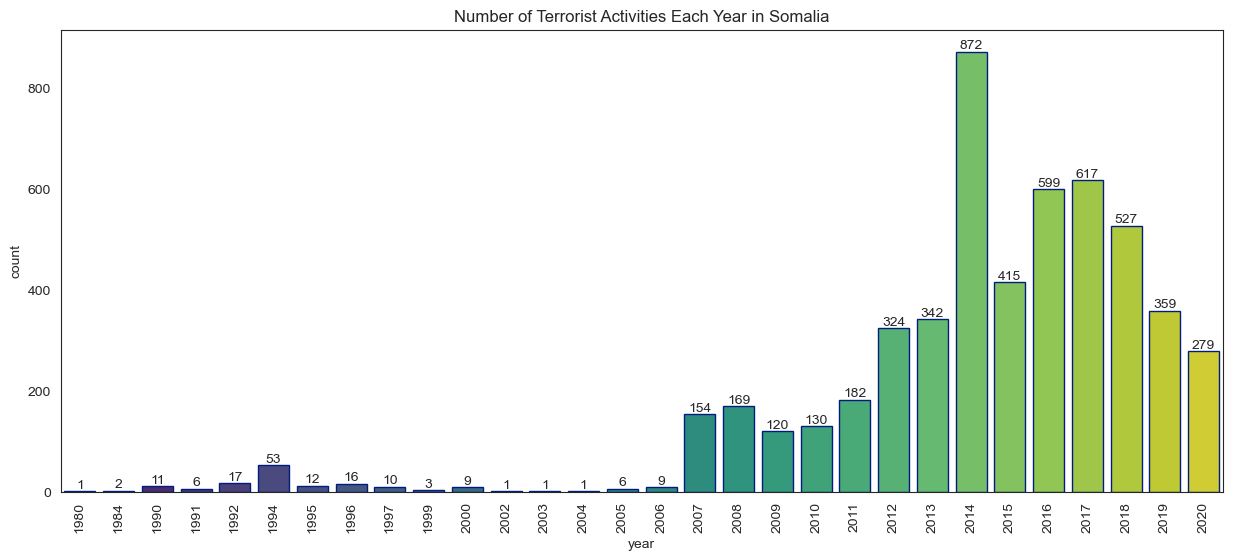

In [75]:
# Create a figure for the countplot
plt.subplots(figsize=(15, 6))
# Create the countplot using the correct syntax
ax = sns.countplot(x='year', data=df, palette='viridis', edgecolor=sns.color_palette('dark', 7))
# Rotate x-ticks for better readability
plt.xticks(rotation=90)
# Set the title of the plot
plt.title('Number of Terrorist Activities Each Year in Somalia')
# Add the number of incidents on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positioning the label
                ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

**Key Insights:**
- The biggest rise in attacks occurred after the early 1990s.
- 2014 was the worst year for terrorism in Somalia.
- There were fewer attacks in the early 2000s, but the overall trend is an increase.
- Political instability and extremist groups likely caused more attacks.
- Terrorism has significantly impacted the country's stability and economy.

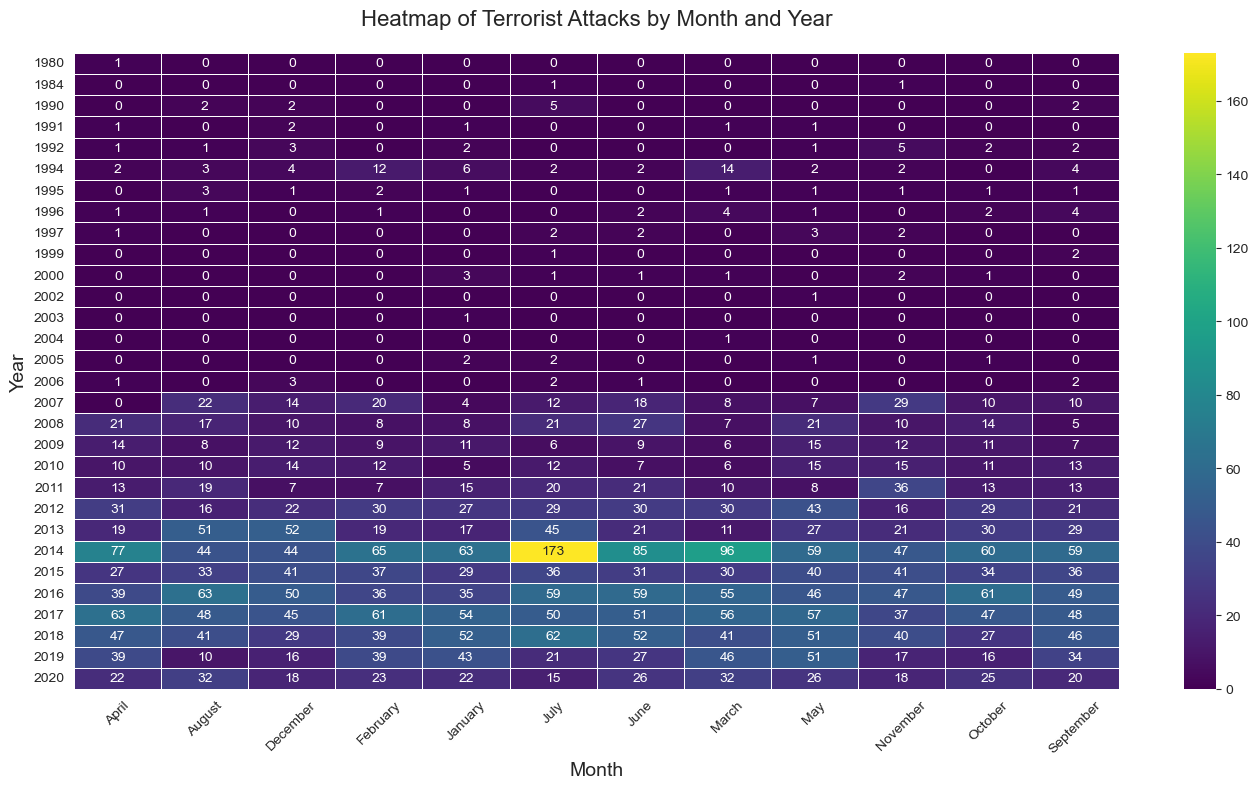

In [77]:
# Create a new column for month name for better readability
df['month_name'] = pd.to_datetime(df[['year', 'month']].assign(day=1)).dt.strftime('%B')

# Group by year and month to get the count of attacks
monthly_attack_counts = df.groupby(['year', 'month_name'])['eventid'].count().reset_index(name='attack_count')

# Create a heatmap for the distribution of attacks across months and years
heatmap_data = df.groupby(['year', 'month_name'])['eventid'].count().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Terrorist Attacks by Month and Year', fontsize=16, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Points:**
- Terrorist attacks have significantly increased over the decades.
- 2014 was the peak year for terrorist activity.
- April, May, and June tended to have more attacks.
- The rise in attacks may be linked to political and regional instability.

* **What are the year-to-year trends in attack frequency?**

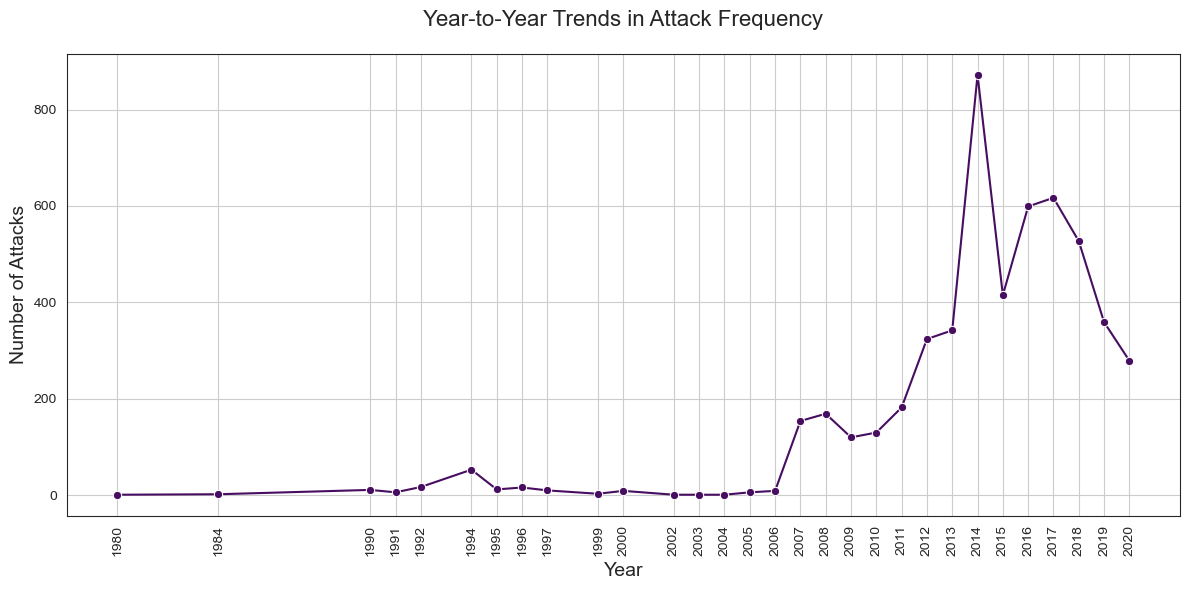

In [78]:
yearly_attack_counts = df.groupby('year').size().reset_index(name='attack_count')

# Set color palette using seaborn viridis
colors = sns.color_palette('viridis', len(yearly_attack_counts))

# Create a line plot for attack frequency over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_attack_counts, x='year', y='attack_count', marker='o', color=colors[0])
plt.title('Year-to-Year Trends in Attack Frequency', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.xticks(yearly_attack_counts['year'], rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

**Key Points:**
- Attacks significantly increased over the decades, peaking in 2014.
- The 1980s and early 1990s had fewer attacks.
- Yearly fluctuations show periods of calm and high activity.
- Political and regional instability likely influenced the rise in attacks.

* **What day of the week has the highest frequency of attacks?**

In [79]:
# Group by the 'day_of_week' and count the number of incidents
day = df.groupby('day_of_week')['eventid'].count().reset_index()
# Rename the columns for clarity
day.columns = ['day_of_week', 'total_incidents']
# Sort values in descending order
daily = day.sort_values(by='total_incidents', ascending=False)
# Display the result
daily

,day_of_week,total_incidents
5,Tuesday,817
1,Monday,798
3,Sunday,794
2,Saturday,778
6,Wednesday,759
4,Thursday,695
0,Friday,606


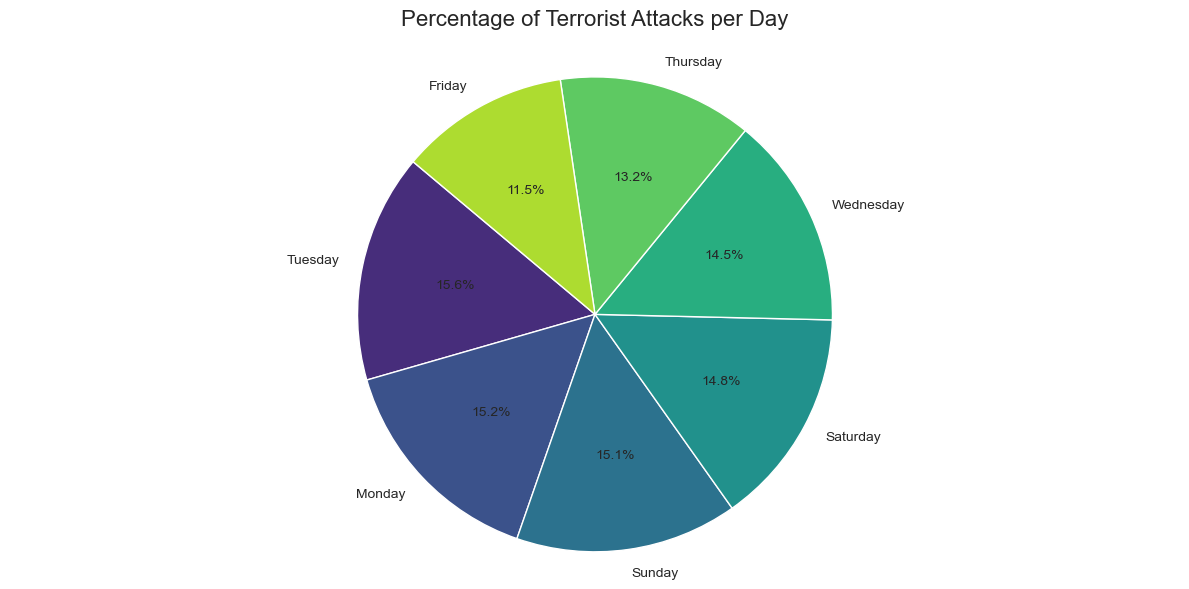

In [80]:
# Set the colors from the viridis palette
colors = sns.color_palette('viridis', n_colors=len(daily))

# Create a pie chart
plt.figure(figsize=(12, 6))  # Increased height for better spacing
plt.pie(daily['total_incidents'], labels=daily['day_of_week'], colors=colors, autopct='%1.1f%%', startangle=140)

# Customize the chart
plt.title('Percentage of Terrorist Attacks per Day', fontsize=16, pad=20)  # Add padding to the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

**Key Points:**
- Wednesday and Thursday are the most active days for attacks.
- Tuesday, Friday, and Saturday also have high attack rates.
- Sunday and Monday see fewer attacks.
- The distribution across the week is balanced, lacking a clear pattern.

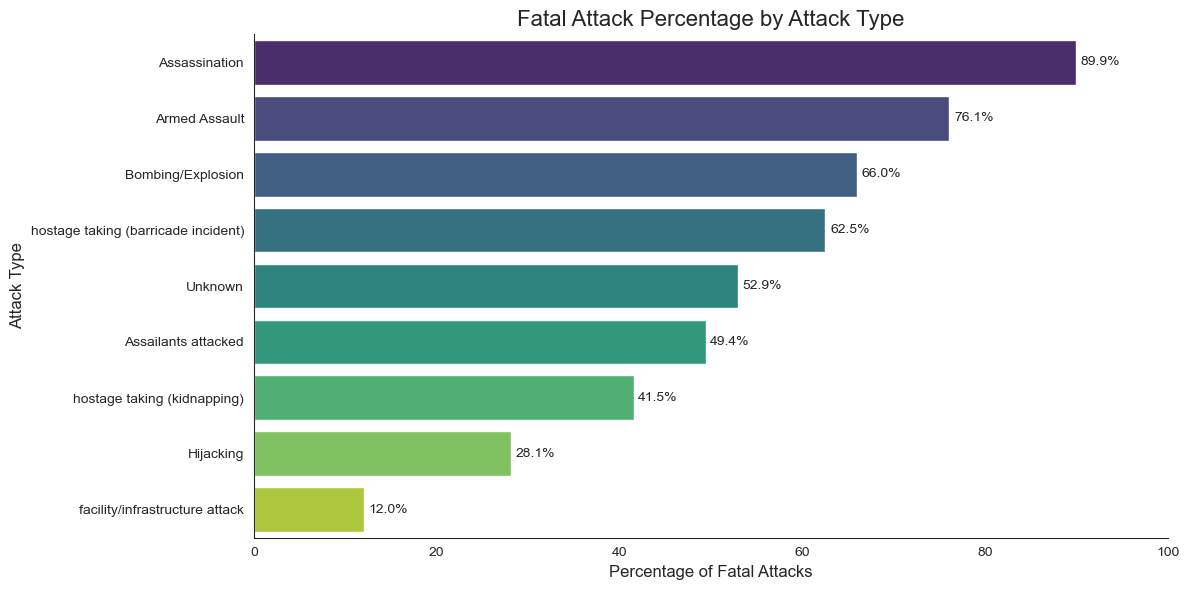

In [81]:
# Filter out 'Unarmed Assault' from the DataFrame
df_filtered = df[df['attack_type'] != 'Unarmed Assault']

# Calculate the counts of fatal attacks and total attacks by attack type
fatal_counts = df_filtered[df_filtered['total_casualties'] > 0].groupby('attack_type').size()  # Only count attacks with casualties
total_counts = df_filtered.groupby('attack_type').size()  # Total attacks after filtering

# Create a DataFrame to summarize the data
attack_summary = pd.DataFrame({
    'Attack Type': total_counts.index,
    'Total Attacks': total_counts.values,
    'Fatal Attacks': fatal_counts.reindex(total_counts.index, fill_value=0).values  # Fill missing values with 0
})

# Calculate the percentage of fatal attacks
attack_summary['Fatal Attack Percentage'] = (attack_summary['Fatal Attacks'] / attack_summary['Total Attacks']) * 100

# Sort the DataFrame by Fatal Attack Percentage in descending order
attack_summary = attack_summary.sort_values(by='Fatal Attack Percentage', ascending=False)

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=attack_summary, y='Attack Type', x='Fatal Attack Percentage', palette='viridis')

# Adding percentage labels to each bar
for index, value in enumerate(attack_summary['Fatal Attack Percentage']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center')  # Adding text in front of the bar

# Customize the plot
plt.title('Fatal Attack Percentage by Attack Type', fontsize=16)
plt.xlabel('Percentage of Fatal Attacks', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)
plt.xlim(0, 100)  # Set x-axis limits to 0-100%
sns.set_style("whitegrid")  # Optional: Add grid style for better readability
sns.despine()  # Optional: Remove the top and right spines for a cleaner look

# Show the plot
plt.tight_layout()
plt.show()

**Key Points:**
- Assassinations lead to the most fatalities.
- Armed assaults and bombings also have high fatality rates.
- Other types show mixed rates, with hijacking and infrastructure attacks being less deadly.
- Further research is needed for understanding regional and temporal differences in fatality rates.

### **3. Geographic Analysis**

* **Which regions and cities in Somalia experience the most attacks?**

In [82]:
# Count the number of attacks by state and city
attack_counts = df.groupby(['region', 'city']).size().reset_index(name='attack_count')
# Find the top 10 cities/states with the most attacks
top_attacks = attack_counts.sort_values(by='attack_count', ascending=False).head(10)
top_attacks

,region,city,attack_count
55,Banaadir,Mogadishu,1976
238,Jubbada Hoose,Kismaayo,230
2,Baay,Baydhaba,191
322,Shabeellaha Hoose,Afgooye,156
162,Hiiraan,Beledweyne,156
261,Mudug,Gaalkacyo,135
62,Bari,Boosaaso,123
388,Shabeellaha Hoose,Marka,114
393,Shabeellaha Hoose,Qoryooleey,100
113,Gedo,Baardheere,61


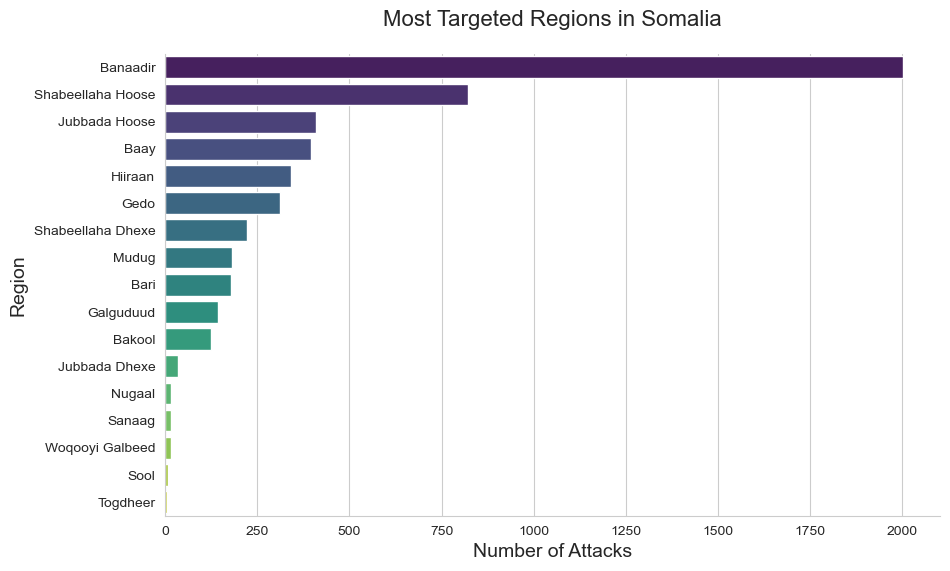

In [83]:
# Filtering out rows where region is 'Unknown'
df_filter = df[df['region'] != 'Unknown']

# Get the top 20 vulnerable regions by counting the occurrences
vulnerable_regions = df_filter['region'].value_counts().head(20)

# Visualization: Bar chart of vulnerable regions
plt.figure(figsize=(10, 6))
sns.barplot(x=vulnerable_regions.values, y=vulnerable_regions.index, palette='viridis')
plt.title('Most Targeted Regions in Somalia', fontsize=16, pad=20)
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('Region', fontsize=14)
sns.despine()
plt.show()

**Key Points:**
- Banadir is the most affected region.
- Shabeellaha Hoose and Jubbada Hoose are also targeted.
- Other regions face attacks but at lower levels.
- Some areas experience fewer attacks due to various factors.
- Additional research is needed to understand regional dynamics better.

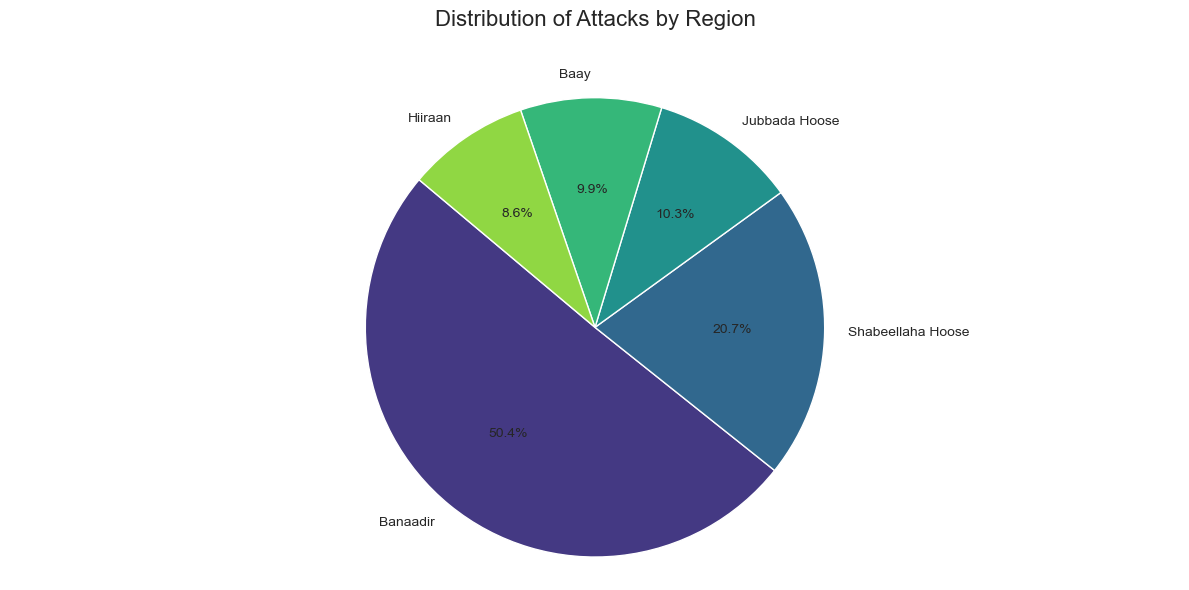

In [84]:
# Count attacks by region
attack_counts_by_region = df['region'].value_counts().head()

# Calculate percentages
attack_percentages_by_region = (attack_counts_by_region / attack_counts_by_region.sum()) * 100

# Create a DataFrame for better visualization
attack_summary = pd.DataFrame({
    'Region': attack_counts_by_region.index,
    'Count': attack_counts_by_region.values,
    'Percentage': attack_percentages_by_region.values
})

# Plotting the pie chart
plt.figure(figsize=(12, 6))
plt.pie(attack_summary['Percentage'], 
        labels=attack_summary['Region'],  # Use 'Region' instead of 'City'
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('viridis', n_colors=len(attack_summary)))

# Customize the plot
plt.title('Distribution of Attacks by Region', fontsize=16, pad=35)  # Adjusting title font size and position
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.tight_layout()
plt.show()

**Key Points:**
- Banadir is the most targeted region with a majority of attacks.
- Shabeellaha Hoose and Jubbada Hoose are also heavily affected.
- Hiiraan and Bay show moderate activity.
- Baay has the least attacks.
- Additional research is needed for a deeper understanding of regional impacts.

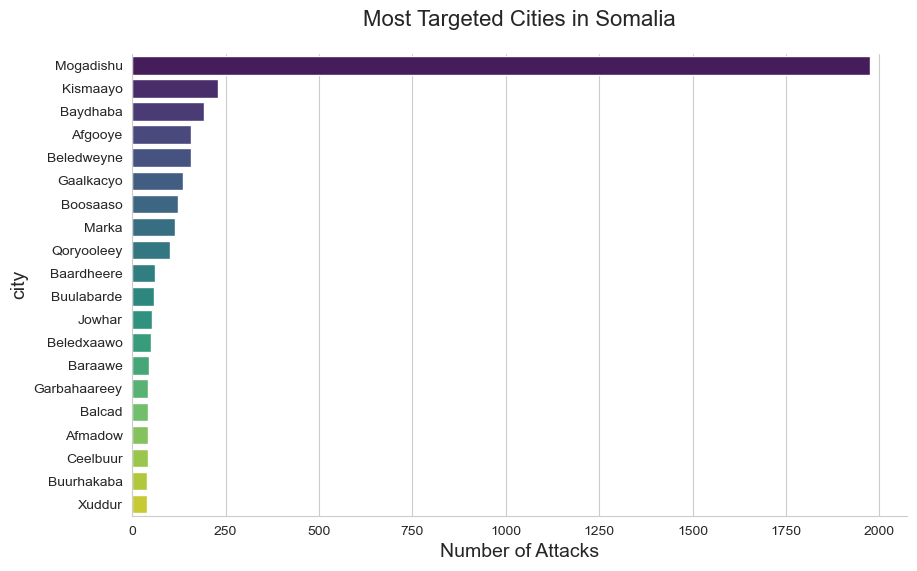

In [85]:
# Filtering out rows where city is 'Unknown'
df_filter = df[df['city'] != 'Unknown']

# Get the top 20 vulnerable citys by counting the occurrences
vulnerable_citys = df_filter['city'].value_counts().head(20)

# Visualization: Bar chart of vulnerable citys
plt.figure(figsize=(10, 6))
sns.barplot(x=vulnerable_citys.values, y=vulnerable_citys.index, palette='viridis')
plt.title('Most Targeted Cities in Somalia', fontsize=16, pad=20)
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('city', fontsize=14)
sns.despine()
plt.show()

**Key Points:**
- Mogadishu is the city most affected by attacks.
- Kismayo, Baydhaba, and Afgooye are frequently targeted.
- Other cities also experience significant attacks.
- Some cities face fewer attacks due to various factors.
- Additional research is necessary for a deeper understanding of city-specific impacts.

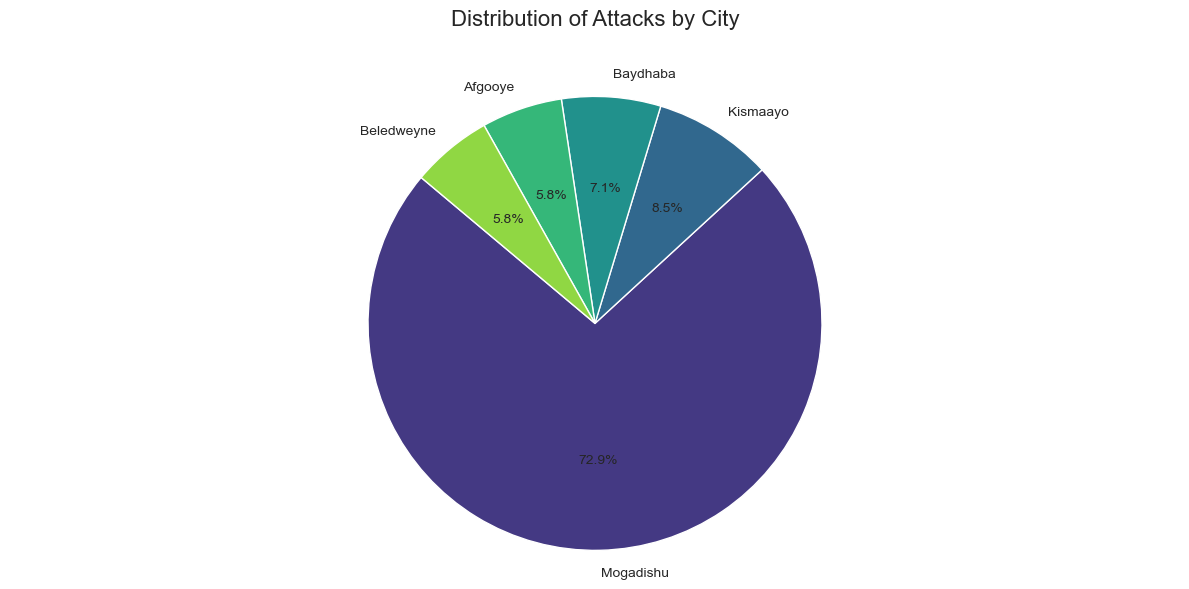

In [86]:
# Count attacks by city
attack_counts_by_city = df['city'].value_counts().head()  # Get the top 5 cities

# Calculate percentages
attack_percentages_by_city = (attack_counts_by_city / attack_counts_by_city.sum()) * 100

# Create a DataFrame for better visualization
attack_summary = pd.DataFrame({
    'City': attack_counts_by_city.index,
    'Count': attack_counts_by_city.values,
    'Percentage': attack_percentages_by_city.values
})

# Plotting the pie chart
plt.figure(figsize=(12, 6))
plt.pie(attack_summary['Percentage'], 
        labels=attack_summary['City'],  # Use 'City' instead of 'Region'
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('viridis', n_colors=len(attack_summary)))

# Customize the plot
plt.title('Distribution of Attacks by City', fontsize=16, pad=35)  # Adjusting title font size and position
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.tight_layout()
plt.show()


**Key Points:**
- Mogadishu has the highest number of attacks.
- Kismayo, Baydhaba, and Afgooye are also significant targets.
- Beledweyne shows moderate activity.
- Variations in attacks can be linked to various factors.
- Additional research is required for a deeper understanding of city-specific impacts.

* **How can we map the geographic distribution of attacks using latitude and longitude?**

In [87]:
# Grouping data by latitude and longitude to count the number of attacks
attack_counts = df.groupby(['lat', 'long']).size().reset_index(name='attack_count')

# Create a base map centered around the average latitude and longitude
m = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=6)

# Create a list of locations for the heatmap
heat_data = [[row['lat'], row['long'], row['attack_count']] for index, row in attack_counts.iterrows()]

# Add heatmap layer
HeatMap(heat_data).add_to(m)

# Save map to HTML file
# m.save('attack_heatmap.html')

# Display the map
m

**How do terrorist activities differ among Somalia's border, coastal, and inland cities?**

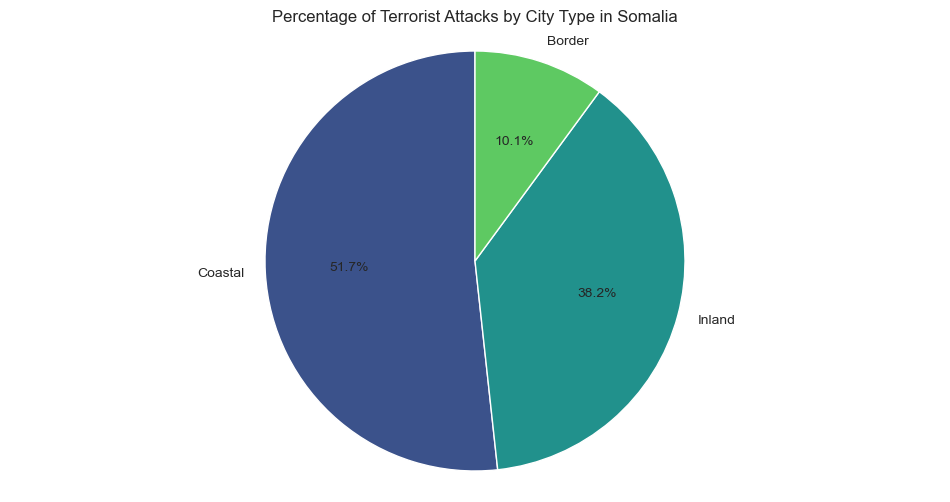

In [88]:
# Define border and coastal cities
coastal_cities = ['Mogadishu', 'Kismaayo', 'Baardheere', 'Hobyo', 'Qandala', 
                  'Bender Qassim', 'Baraawe','Marka', 'Laas Qoray', 'Boosaaso', 'Gaalkacyo',
                  'Eyl', 'Xarardheere']

border_cities = ['Buulaxaawo', 'Ceelwaaq', 'Doolow', 'Luuq', 'Beledxaawo', 
                 'Dhuusamareeb', 'Baydhaba', 'Garbahaareey', 'Beledweyne',
                 'Dhoobleey']

# Create a new column to classify city types
df['city_type'] = 'Inland'  # Default type
df.loc[df['city'].isin(coastal_cities), 'city_type'] = 'Coastal'
df.loc[df['city'].isin(border_cities), 'city_type'] = 'Border'

# Count the number of attacks by city type
city_counts = df['city_type'].value_counts(normalize=True).reset_index()
city_counts.columns = ['city_type', 'percentage']

# Plotting the results as a pie chart
plt.figure(figsize=(12, 6))
colors = sns.color_palette('viridis', len(city_counts))

# Create the pie chart
plt.pie(city_counts['percentage'], labels=city_counts['city_type'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Terrorist Attacks by City Type in Somalia')
plt.show()


**Key Points:**
- Coastal cities are the most affected by attacks.
- Inland cities are also significant targets.
- Border cities face the least number of attacks.
- Variations in attack frequencies can be linked to several factors.
- Additional research is needed for a deeper understanding of city type impacts.

### **4. Casualty Analysis**

* **What are the total casualties (killed and wounded) across all attacks?**

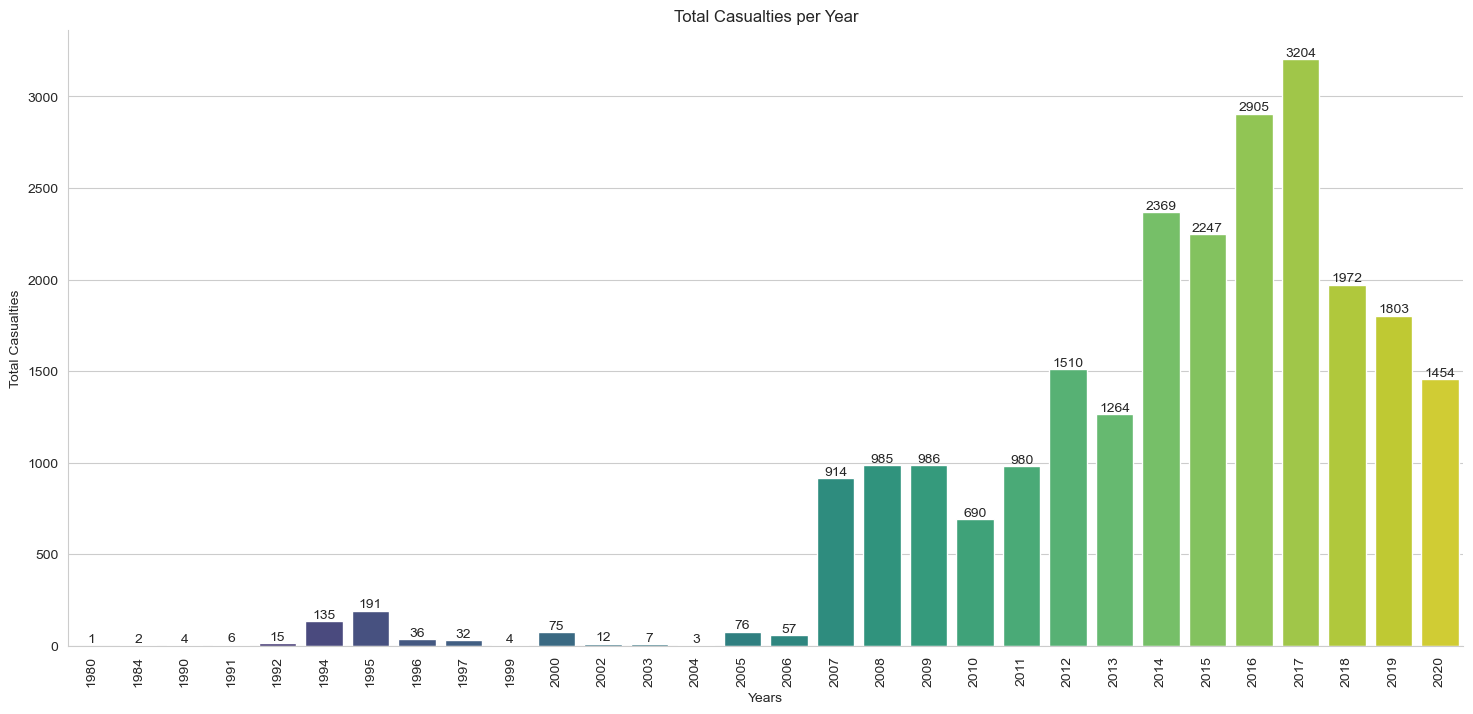

In [89]:
# Prepare the Data
affected = df.groupby(['year'])['total_casualties'].sum().reset_index()

# Bar plot for total casualties
plt.figure(figsize=(18, 8))

# Use the viridis palette for the bars
palette = sns.color_palette('viridis', n_colors=len(affected))

# Plot the bar chart using the viridis palette
ax = sns.barplot(data=affected, x='year', y='total_casualties', palette=palette)

# Adding counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Customize the Plot
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Total Casualties")
plt.title("Total Casualties per Year")
sns.set_style("whitegrid")  # Optional: Add a grid style for better readability
sns.despine()  # Optional: Remove the top and right spines for a cleaner look

# Show the Plot
plt.show()

**Key Points:**
- Total casualties have generally increased over time.
- Significant peaks correspond with major attacks or escalated violence.
- Some years experienced fewer casualties, indicating relative calm.
- Variations in casualty numbers relate to attack frequency and scale.
- Additional research is necessary for a clearer understanding of casualty dynamics.

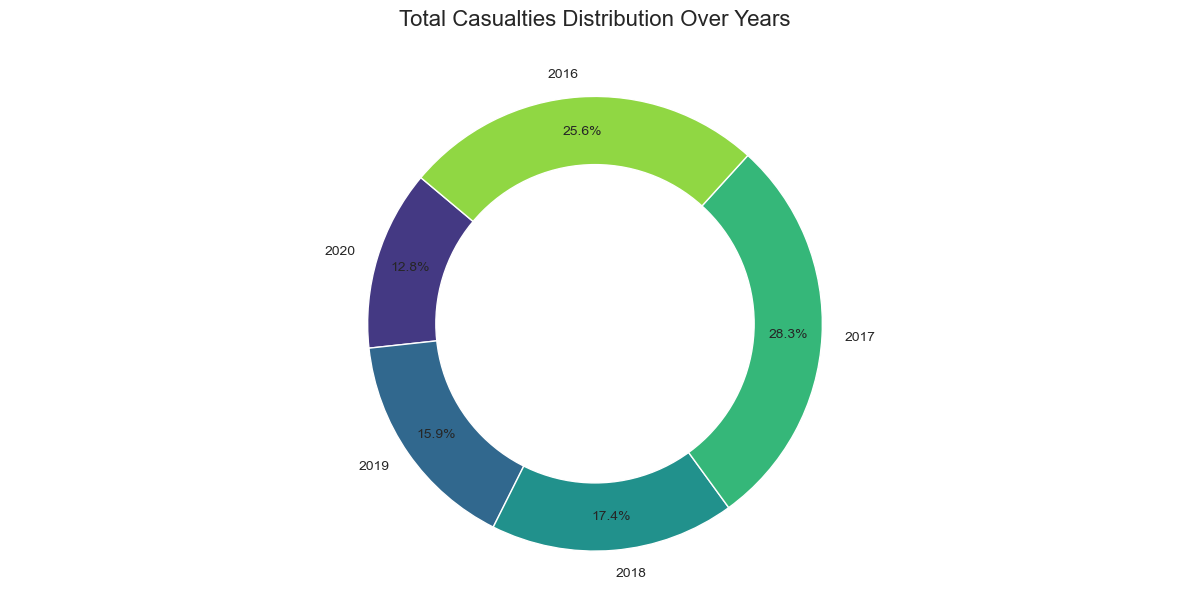

In [90]:
# Prepare the Data
affected = df.groupby(['year'])['total_casualties'].sum().sort_index(ascending=False).reset_index().head()

# Calculate percentages
total_casualties = affected['total_casualties'].sum()
affected['percentage'] = (affected['total_casualties'] / total_casualties) * 100

# Create the donut chart
plt.figure(figsize=(12, 6))
colors = sns.color_palette('viridis', n_colors=len(affected))

# Draw the pie chart
wedges, texts, autotexts = plt.pie(affected['total_casualties'], 
                                    labels=affected['year'], 
                                    autopct='%1.1f%%', 
                                    startangle=140, 
                                    colors=colors, 
                                    pctdistance=0.85)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.title('Total Casualties Distribution Over Years', fontsize=16, pad=35)
plt.tight_layout()  # Adjust layout to make room for the donut shape
plt.show()

**Key Points:**
- **2017** was the most deadly year, with **28.3%** of casualties.
- **2016** and **2018** also had significant casualties.
- Casualties were moderate in **2019** and **2020**.
- Variations could be linked to conflict intensity and security measures.
- Further research is needed to clarify types and impacts of casualties.

* **How have casualty trend changed over time?**

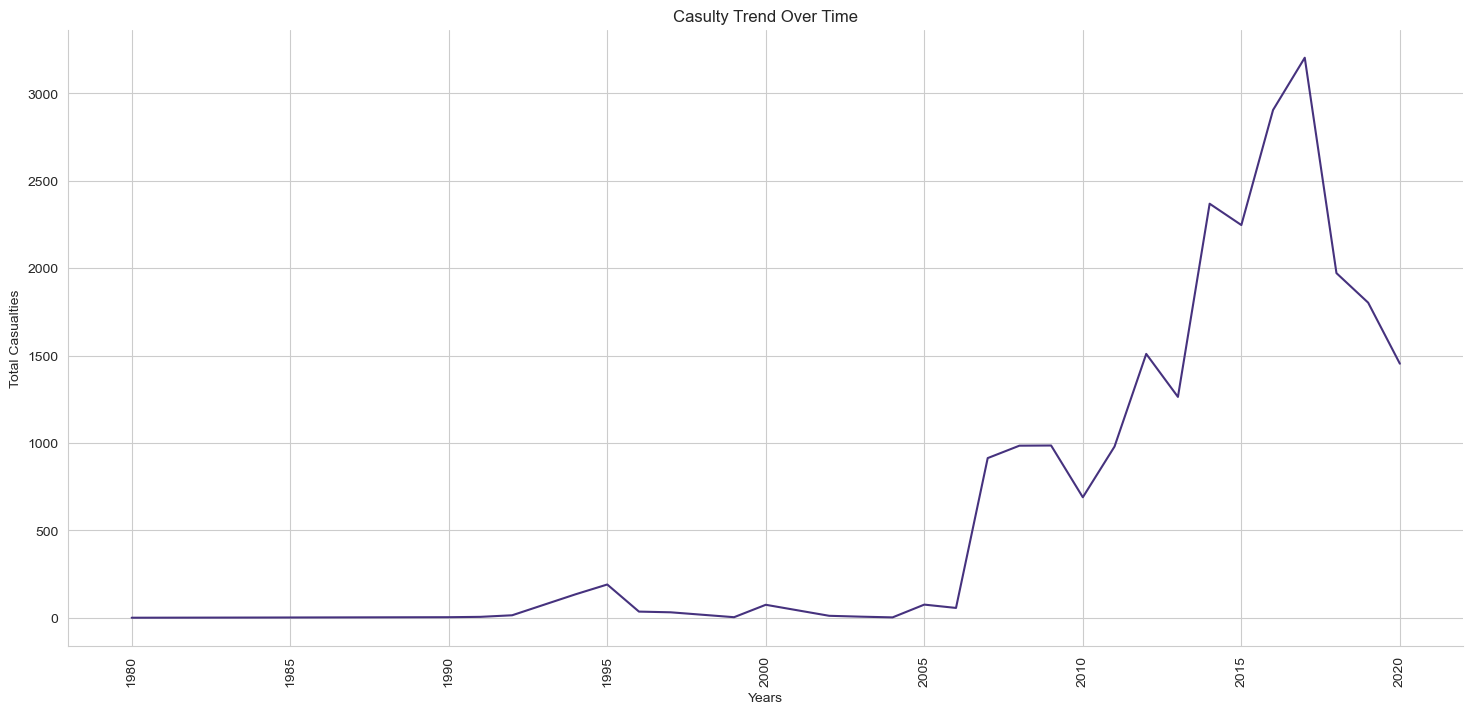

In [130]:
# Prepare the Data
affected = df.groupby(['year'])['total_casualties'].sum().reset_index()

# Bar plot for total casualties
plt.figure(figsize=(18, 8))

# Plot the line using the viridis palette
sns.lineplot(data=affected, x='year', y='total_casualties', color=sns.color_palette('viridis')[0])

# Customize the Plot
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Total Casualties")
plt.title("Casulty Trend Over Time")
sns.set_style("whitegrid")  # Optional: Add a grid style for better readability
sns.despine()  # Optional: Remove the top and right spines for a cleaner look

# Show the Plot
plt.show()

**Key Points:**
- Casualties have increased significantly, peaking in **2014**.
- The **mid-1990s** to **early 2000s** saw calm periods.
- There are fluctuations in yearly casualty numbers.
- Factors like **instability** and **extremism** contribute to the trend.
- Further research is needed for a complete understanding.

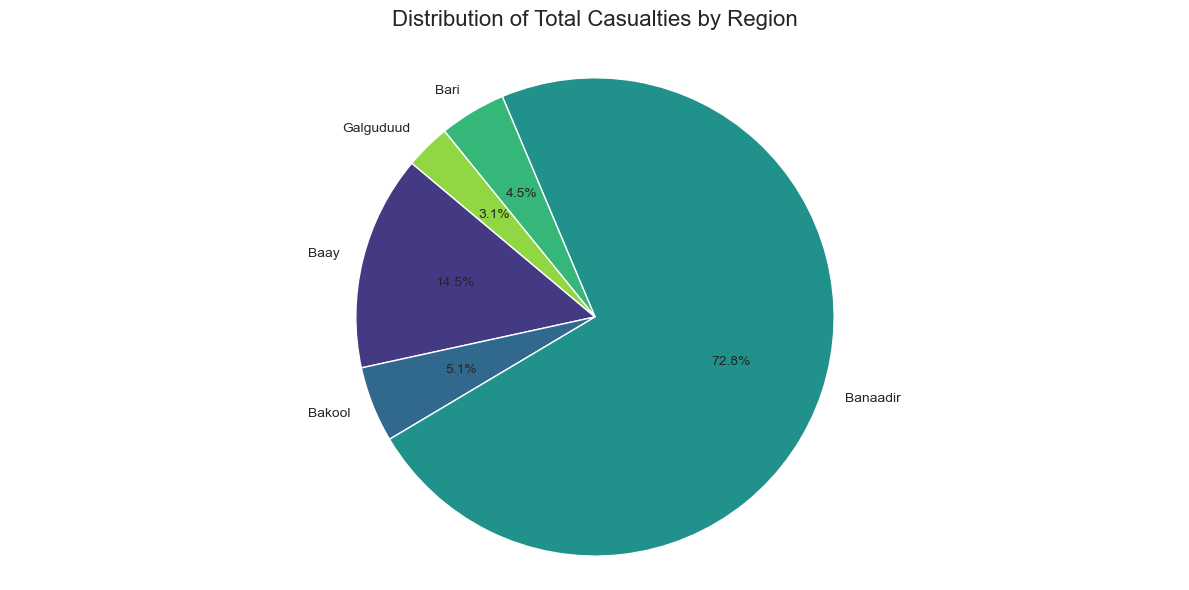

In [93]:
# Group by region and sum casualties
region_casualties = df.groupby('region')['total_casualties'].sum().reset_index().head()

# Calculate total casualties
total_casualties = region_casualties['total_casualties'].sum()

# Calculate percentages
region_casualties['percentage'] = (region_casualties['total_casualties'] / total_casualties) * 100

# Create the pie chart
plt.figure(figsize=(12, 6))
colors = sns.color_palette('viridis', n_colors=len(region_casualties))

# Draw the pie chart
plt.pie(region_casualties['total_casualties'], 
        labels=region_casualties['region'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors)

# Customize the plot
plt.title('Distribution of Total Casualties by Region', fontsize=16, pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.tight_layout()
plt.show()

- **Banadir** is the most affected region.
- **Shabeellaha Hoose** and **Baay** follow with significant casualties.
- Many regions report lower casualty figures.
- Casualty variation is influenced by extremist presence and region significance.
- Further analysis is required for comprehensive insights on casualties.

* **What types of attacks or weapons cause the most casualties?**

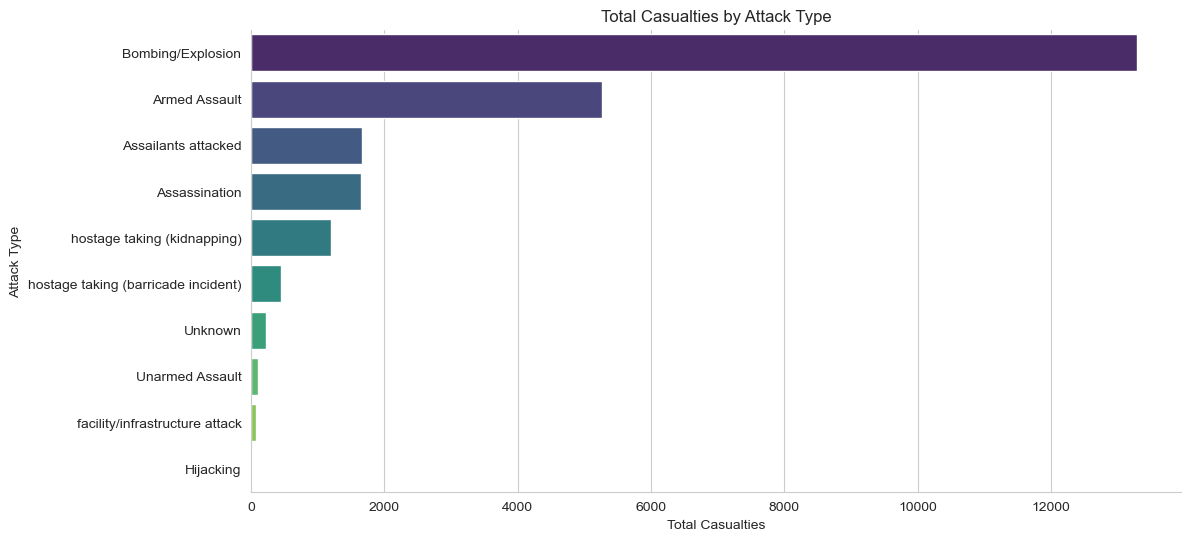

In [94]:
# Group by attack type and sum casualties
attack_types = df.groupby('attack_type')['total_casualties'].sum().reset_index()

# Bar plot for total casualties by attack type
plt.figure(figsize=(12, 6))
sns.barplot(data=attack_types.sort_values(by='total_casualties', ascending=False), 
            x='total_casualties', y='attack_type', palette='viridis')

# Customize the plot
plt.title("Total Casualties by Attack Type")
plt.xlabel("Total Casualties")
plt.ylabel("Attack Type")
sns.set_style("whitegrid")
sns.despine()
# Show the plot
plt.show()

**Key Points:**
- **Bombing/explosion** attacks lead in casualties.
- **Armed assaults** and **assailants attacked** also contribute significantly.
- Various other attack types have lower casualty figures.
- Casualty variations may relate to attack nature and tactics.
- Additional research is needed for insights on geography and time frames.

* **Which region reports the highest number of total casualties?**

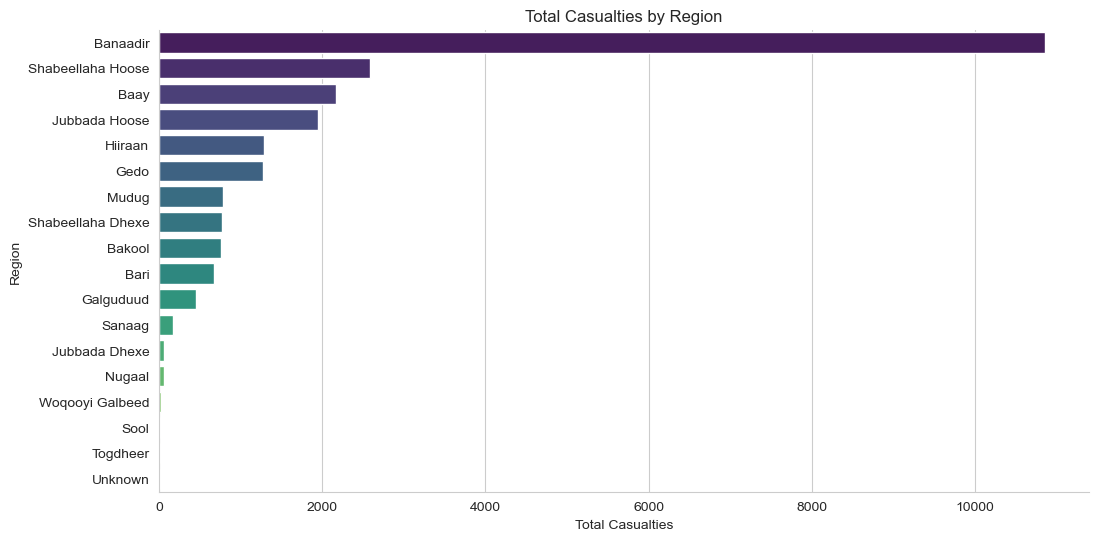

In [131]:
# Group by region and sum casualties
region_casualties = df.groupby('region')['total_casualties'].sum().reset_index()

# Bar plot for total casualties by region
plt.figure(figsize=(12, 6))
sns.barplot(data=region_casualties.sort_values(by='total_casualties', ascending=False), 
            x='total_casualties', y='region', palette='viridis')

# Customize the plot
plt.title("Total Casualties by Region")
plt.xlabel("Total Casualties")
plt.ylabel("Region")
sns.set_style("whitegrid")
sns.despine()
# Show the plot
plt.show()

**Key Points:**
- **Banadir** is the most affected region.
- **Shabeellaha Hoose** and **Baay** follow with significant casualties.
- Many regions report lower casualty figures.
- Casualty variation is influenced by extremist presence and region significance.
- Further analysis is required for comprehensive insights on casualties.

* **How do suicide attacks compare to non-suicide attacks in terms of casualties?**

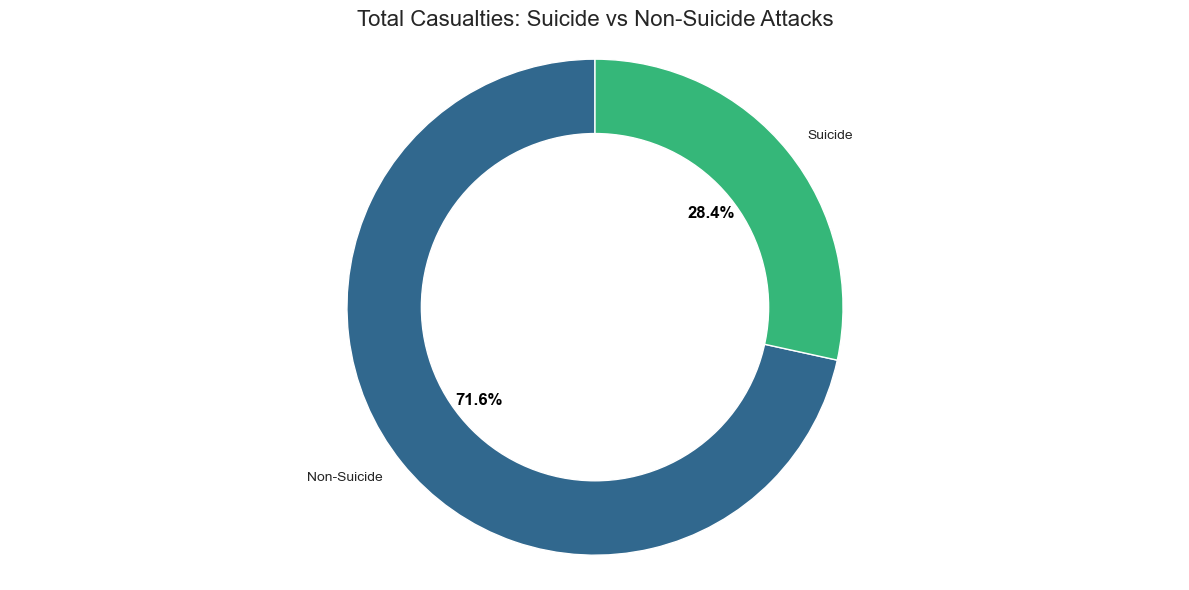

In [96]:
# Group by suicide flag and sum total casualties
suicide_casualties = df.groupby('suicide')['total_casualties'].sum().reset_index()
# Map boolean to labels for better readability
suicide_casualties['suicide'] = suicide_casualties['suicide'].map({0: 'Non-Suicide', 1: 'Suicide'})
# Prepare data for the donut chart
sizes = suicide_casualties['total_casualties']
labels = suicide_casualties['suicide']

# Set up the figure
plt.figure(figsize=(12, 6))
# Create a pie chart
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(labels)))
# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie chart is a circle
plt.axis('equal')  
plt.title("Total Casualties: Suicide vs Non-Suicide Attacks", fontsize=16)
plt.setp(autotexts, size=12, weight="bold", color="black")
# Show the plot
plt.tight_layout()
plt.show()

**Key Points:**
- **71.6%** of casualties are from **non-suicide attacks**.
- **28.4%** of casualties arise from **suicide attacks**.
- Variations are influenced by tactics, targets, and security measures.
- Data limitations require additional analysis for a complete understanding.

In [97]:
# Find the deadliest attacks by sorting the total casualties
deadliest_attacks = df[['event_date', 'city', 'region', 'total_casualties']].sort_values(by='total_casualties', ascending=False).head(15)
deadliest_attacks

,event_date,city,region,total_casualties
3979,2017-10-14,Mogadishu,Banaadir,904
859,2011-10-04,Mogadishu,Banaadir,268
3069,2019-12-28,Mogadishu,Banaadir,232
787,2009-10-13,Mogadishu,Banaadir,200
729,1995-08-26,Mogadishu,Banaadir,172
4689,2019-02-28,Mogadishu,Banaadir,157
2887,2016-01-15,Ceel Cadde,Gedo,142
762,2008-02-05,Boosaaso,Bari,121
177,2007-02-19,Mogadishu,Banaadir,113
3089,2016-06-09,Halgan,Hiiraan,111


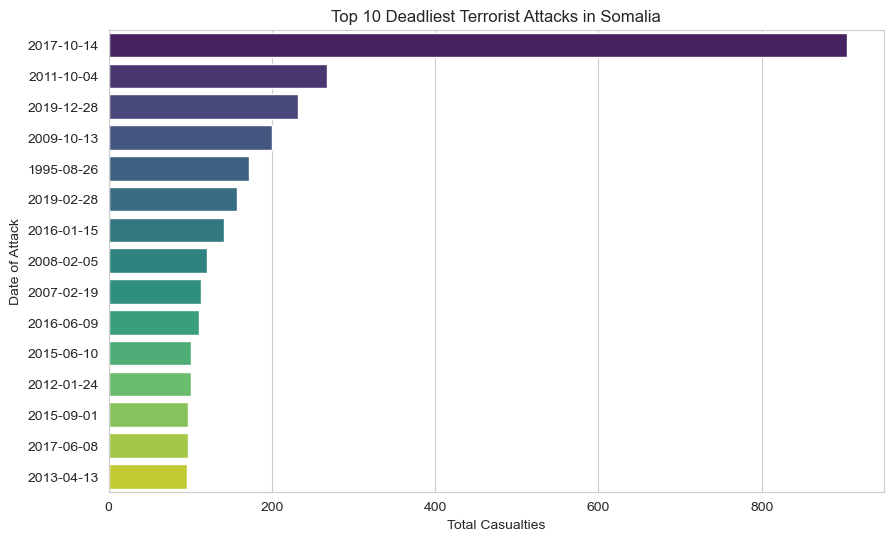

In [98]:
# Find the deadliest attacks by sorting the total casualties
deadliest_attacks = df[['eventid', 'event_date', 'city', 'region', 'total_casualties']].sort_values(by='total_casualties', ascending=False).head(15)
# Visualization: Bar chart of the deadliest attacks
plt.figure(figsize=(10, 6))
sns.barplot(data=deadliest_attacks, x='total_casualties', y='event_date', palette='viridis')
plt.title('Top 10 Deadliest Terrorist Attacks in Somalia')
plt.xlabel('Total Casualties')
plt.ylabel('Date of Attack')
plt.show()

**Key Points:**
- The **October 14, 2017** attack is the **deadliest** recorded.
- Many deadliest attacks occurred **recently**, especially between **2011-2019**.
- Historical attacks, such as the **1995** incident, also feature prominently.
- Variations in casualties can be attributed to **targets**, **tactics**, and **security**.
- The chart's focus on the top 10 deadliest attacks may omit broader patterns in terrorist activity.

### **5. Attack and Weapon Analysis**

* **What are the most common types of attacks?**

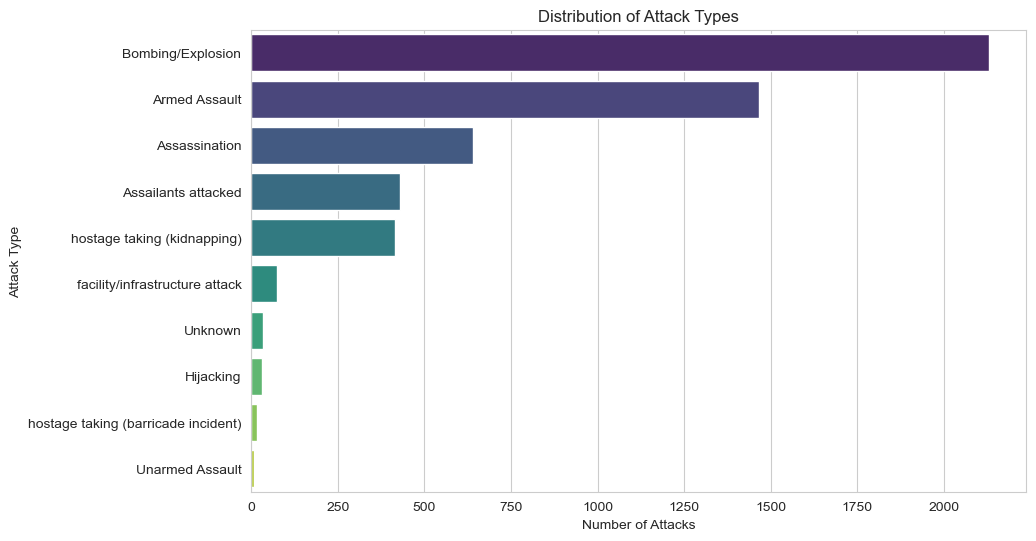

In [99]:
# Attack Type Distribution
attack_type_distribution = data['attack_type'].value_counts().reset_index()
attack_type_distribution.columns = ['Attack Type', 'Count']

# Plotting Attack Type Distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=attack_type_distribution, x='Count', y='Attack Type', palette='viridis')
plt.title('Distribution of Attack Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()

**Key Points:**
- **Bombing/explosion** is the predominant attack type.
- **Armed assaults** and **assassinations** are also significant.
- Less frequent attack types include various methods, indicating diverse tactics.
- The frequency of attack types may depend on factors like tactics, targets, and security.
- Limitations exist regarding regional and temporal insights, necessitating further analysis for a comprehensive understanding.

* **Which weapons are most frequently used?**

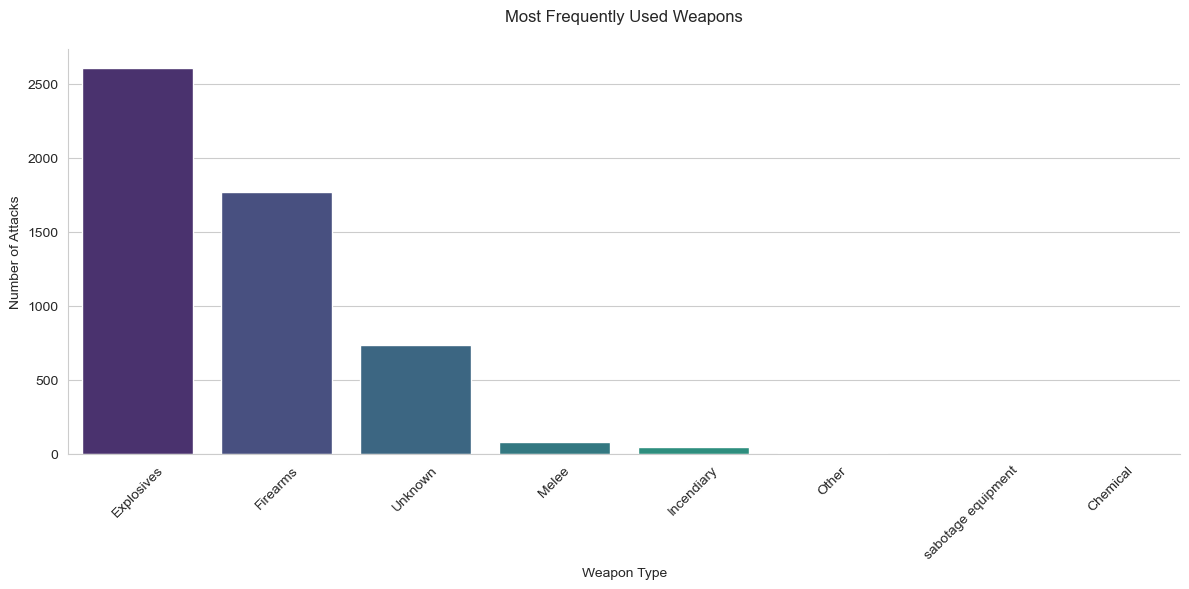

In [100]:
# Count the occurrences of each weapon type
weapon_counts = df['weapon_type'].value_counts().reset_index()
weapon_counts.columns = ['Weapon Type', 'Count']

# Plot the bar chart for the most frequently used weapons
plt.figure(figsize=(12, 6))
sns.barplot(data=weapon_counts, x='Weapon Type', y='Count', palette='viridis')

# Customize the plot
plt.title("Most Frequently Used Weapons", pad=20)
plt.xlabel("Weapon Type")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

* **Have attack and weapon patterns changed over time?**

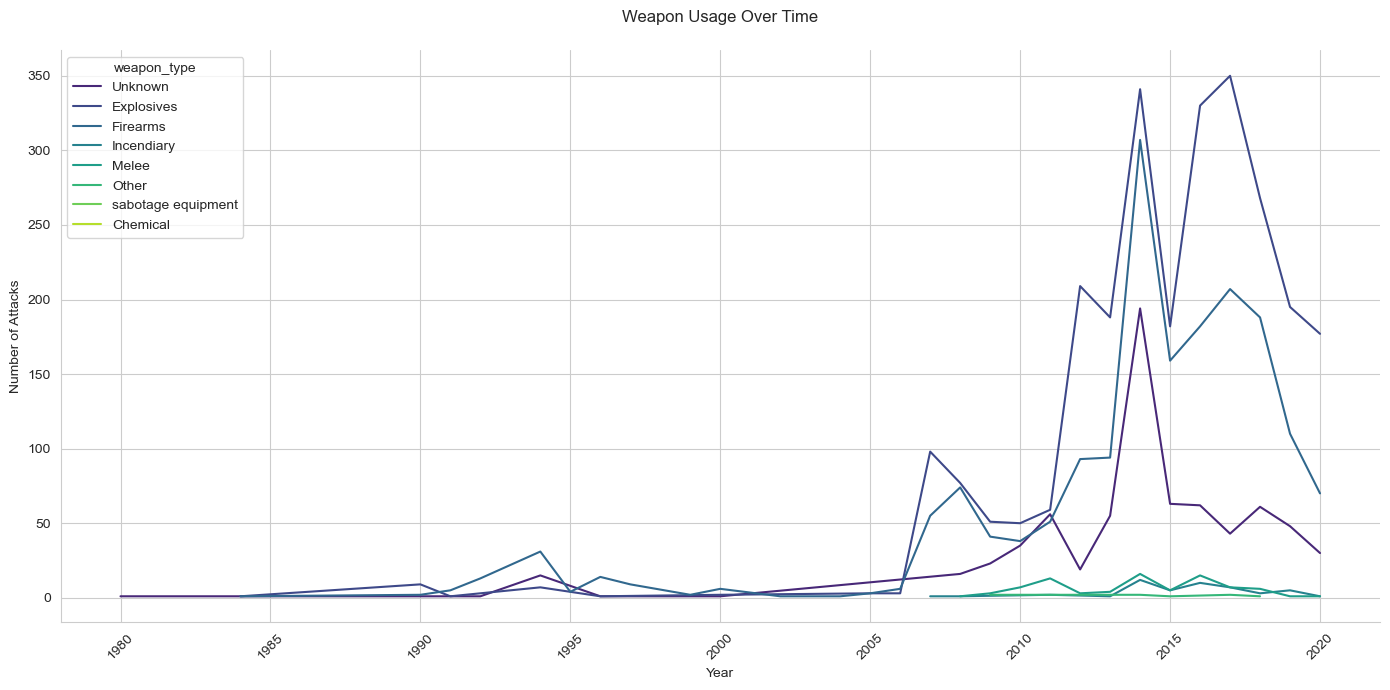

In [102]:
# Group by year and weapon type to count the number of attacks
weapon_over_time = df.groupby(['year', 'weapon_type']).size().reset_index(name='attack_count')

# Plot the line chart to show the change in weapon use over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=weapon_over_time, x='year', y='attack_count', hue='weapon_type', palette='viridis')

# Customize the plot
plt.title("Weapon Usage Over Time", pad=20)
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

* **How many attacks were suicide attacks versus non-suicide?**

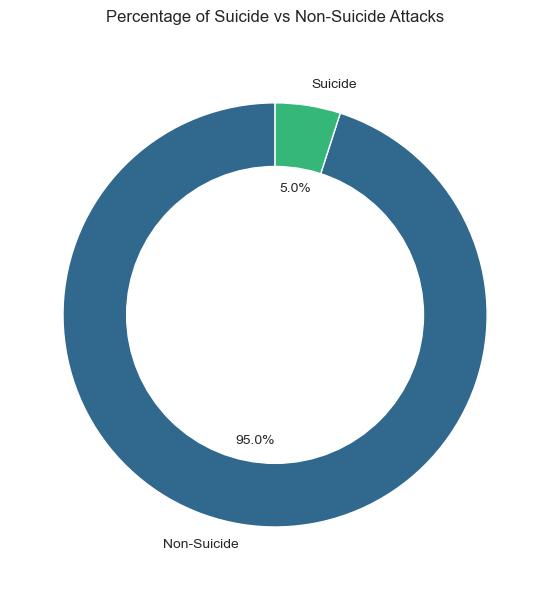

In [125]:
# Count the number of suicide and non-suicide attacks
suicide_counts = df['suicide'].value_counts().reset_index()
suicide_counts.columns = ['Suicide Attack', 'Count']
suicide_counts['Suicide Attack'] = suicide_counts['Suicide Attack'].map({0: 'Non-Suicide', 1: 'Suicide'})

# Plot a donut chart for suicide vs non-suicide attacks
plt.figure(figsize=(12, 6))  # Set the figure size to 12x6
colors = sns.color_palette('viridis', n_colors=len(suicide_counts))  # Get colors from the viridis palette

plt.pie(suicide_counts['Count'], 
        labels=suicide_counts['Suicide Attack'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors)  # Use the viridis colors

plt.title("Percentage of Suicide vs Non-Suicide Attacks", pad=20)

# Draw a circle in the middle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.gca().set_aspect('equal')

# Show the plot
plt.tight_layout()
plt.show()

**Key Points:**
- Non-suicide attacks are significantly more common than suicide attacks.
- The chart highlights the low prevalence of suicide attacks at **5.0%**.
- Variations may stem from tactical choices, target types, and security effectiveness.
- Limitations exist regarding regional and temporal context, requiring further analysis.

* **Which weapon types are used in suicide attacks?**

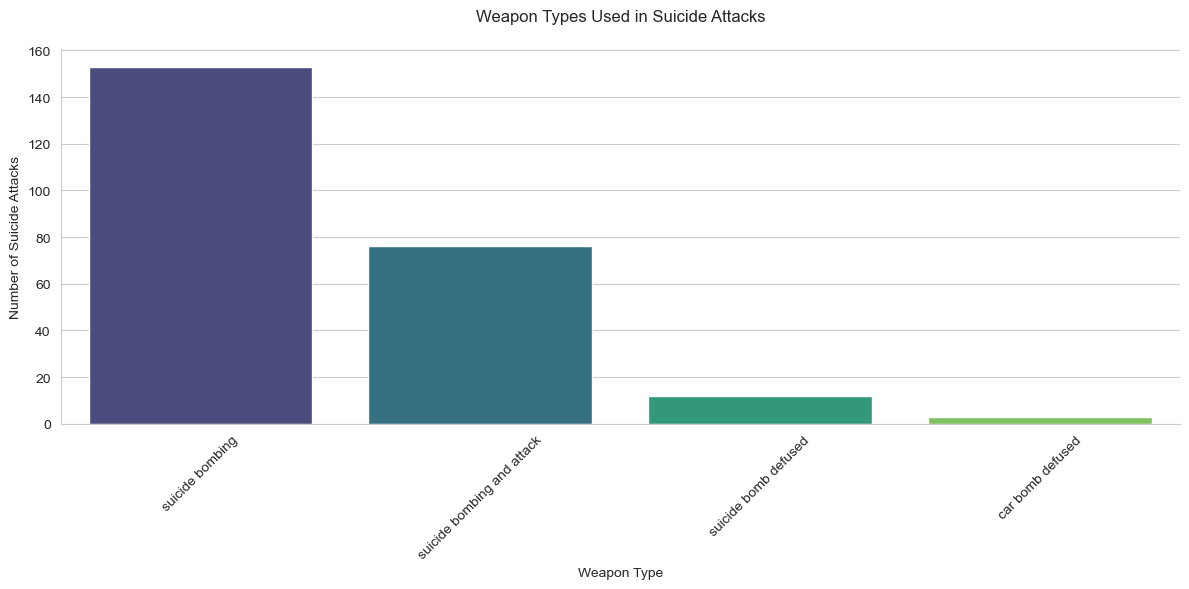

In [104]:
# Filter out rows where weapon_type is 'Unknown'
dfsu = df[df['weapon_detail'] != 'Unknown']

# Filter for suicide attacks and count the weapon types used
suicide_weapon_counts = dfsu[dfsu['suicide'] == 1]['weapon_detail'].value_counts().reset_index()
suicide_weapon_counts.columns = ['Weapon Type', 'Count']

# Plot the bar chart for weapon types used in suicide attacks
plt.figure(figsize=(12, 6))
sns.barplot(data=suicide_weapon_counts, x='Weapon Type', y='Count', palette='viridis')

# Customize the plot
plt.title("Weapon Types Used in Suicide Attacks", pad=20)
plt.xlabel("Weapon Type")
plt.ylabel("Number of Suicide Attacks")
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

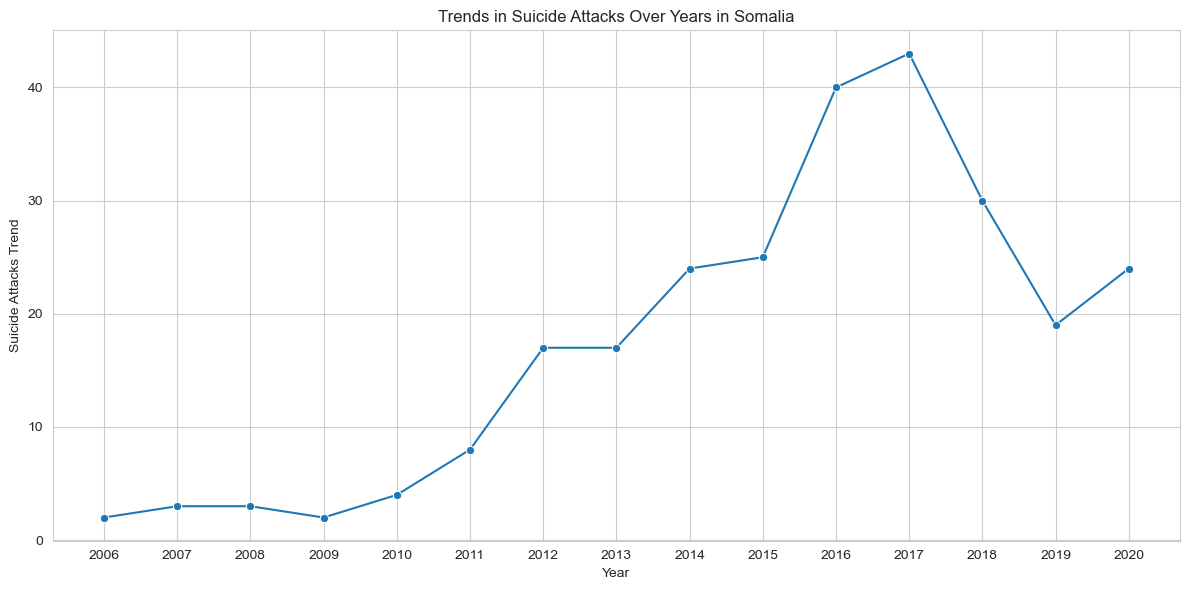

In [126]:
# Count suicide attacks
suicide_attacks = df[df['suicide'] == 1]
suicide_counts = suicide_attacks['group_name'].value_counts()
# Grouping suicide attacks by year
suicide_trends = suicide_attacks.groupby('year').size()

# Plotting the trends in suicide attacks over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=suicide_trends.index, y=suicide_trends.values, marker='o', palette='viridis')
plt.title('Trends in Suicide Attacks Over Years in Somalia')
plt.xlabel('Year')
plt.ylabel('Suicide Attacks Trend')
plt.xticks(suicide_trends.index)
plt.tight_layout()
plt.show()

**Key Points:**
- A significant upward trend in suicide attacks is evident, peaking in **2017**.
- Yearly fluctuations highlight variability in attack frequency.
- The increase may be linked to changing tactics, security dynamics, and socio-political factors.
- Important context, such as details about perpetrators and targets, is missing, necessitating additional analysis.

### **6. Group Analysis**

* **Which groups are responsible for the most attacks?**

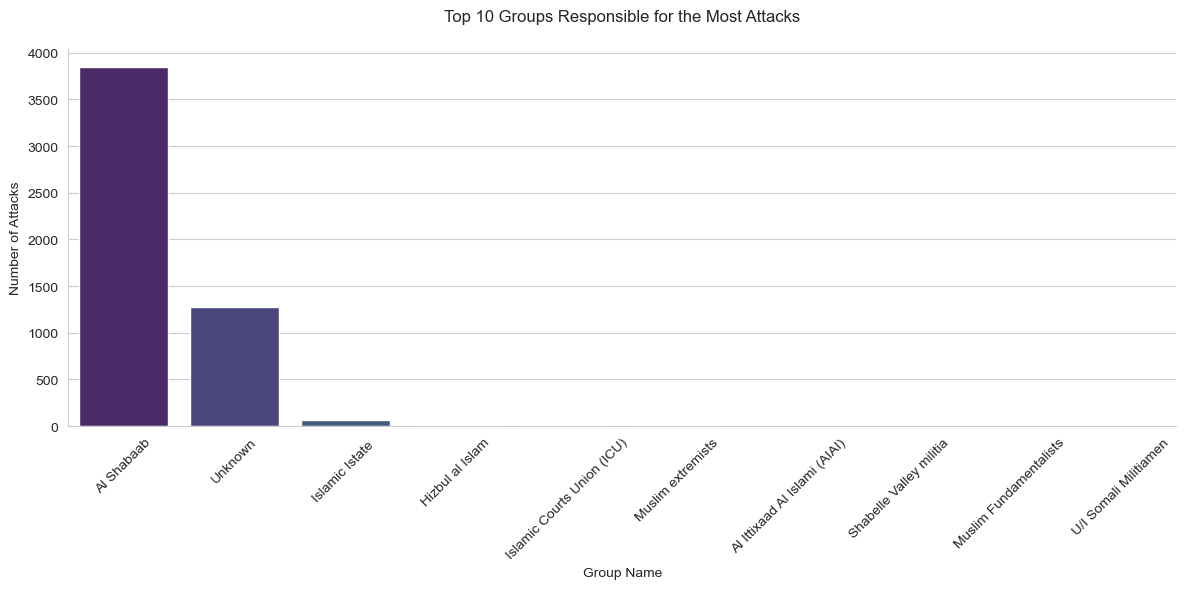

In [106]:
# Count the number of attacks by group
group_counts = df['group_name'].value_counts().reset_index()
group_counts.columns = ['Group Name', 'Count']

# Plot the bar chart for the most responsible groups
plt.figure(figsize=(12, 6))
sns.barplot(data=group_counts.head(10), x='Group Name', y='Count', palette='viridis')

# Customize the plot
plt.title("Top 10 Groups Responsible for the Most Attacks", pad=20)
plt.xlabel("Group Name")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

* **How do different groups compare in terms of success rates and casualties?**

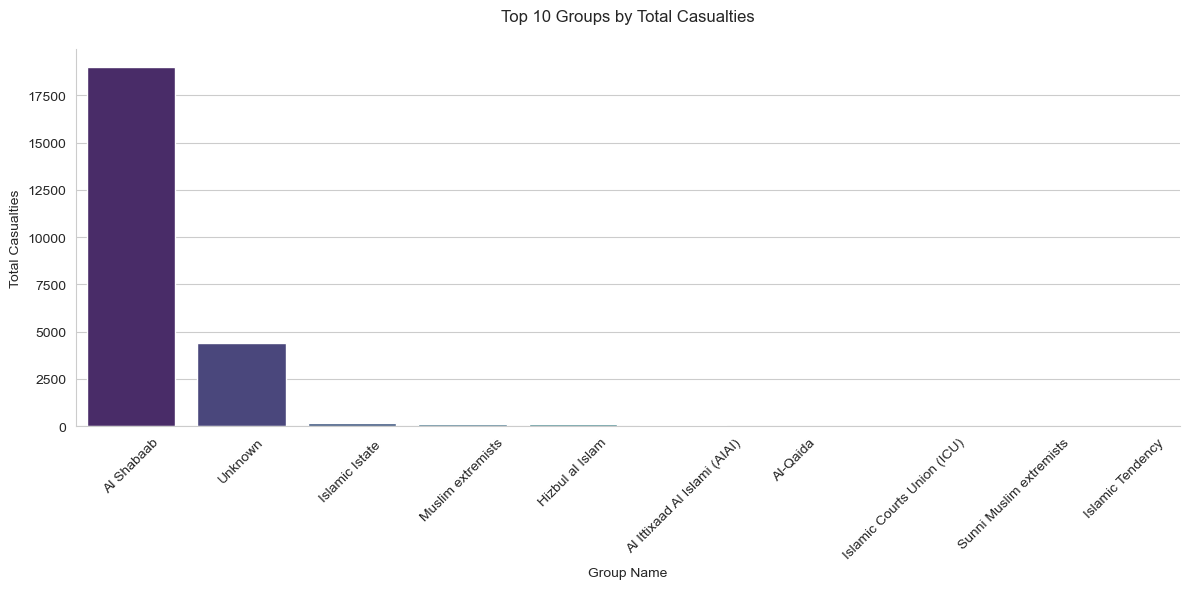

In [107]:
# Group by group_name and calculate the success rate and total casualties
group_success_casualties = df.groupby('group_name').agg(
    success_rate=('success', 'mean'),
    total_casualties=('total_casualties', 'sum')
).reset_index()

# Sort by success rate and filter for the top groups
group_success_casualties = group_success_casualties.sort_values(by='total_casualties', ascending=False).head(10)

# Plot a bar chart comparing success rate and total casualties
plt.figure(figsize=(12, 6))
sns.barplot(data=group_success_casualties, x='group_name', y='total_casualties', palette='viridis')

# Customize the plot for casualties
plt.title("Top 10 Groups by Total Casualties", pad=20)
plt.xlabel("Group Name")
plt.ylabel("Total Casualties")
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.despine()

plt.tight_layout()
plt.show()

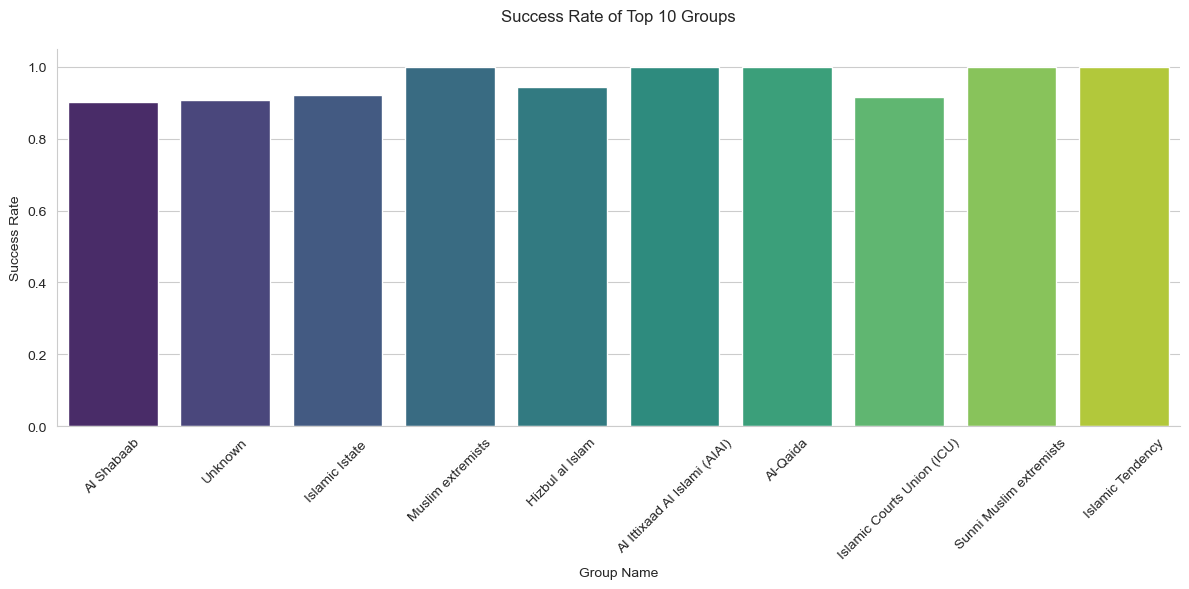

In [108]:

# Plot success rate separately
plt.figure(figsize=(12, 6))
sns.barplot(data=group_success_casualties, x='group_name', y='success_rate', palette='viridis')

# Customize the plot for success rate
plt.title("Success Rate of Top 10 Groups", pad=20)
plt.xlabel("Group Name")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.despine()

plt.tight_layout()
plt.show()

* **Which groups have become more active in recent years?**

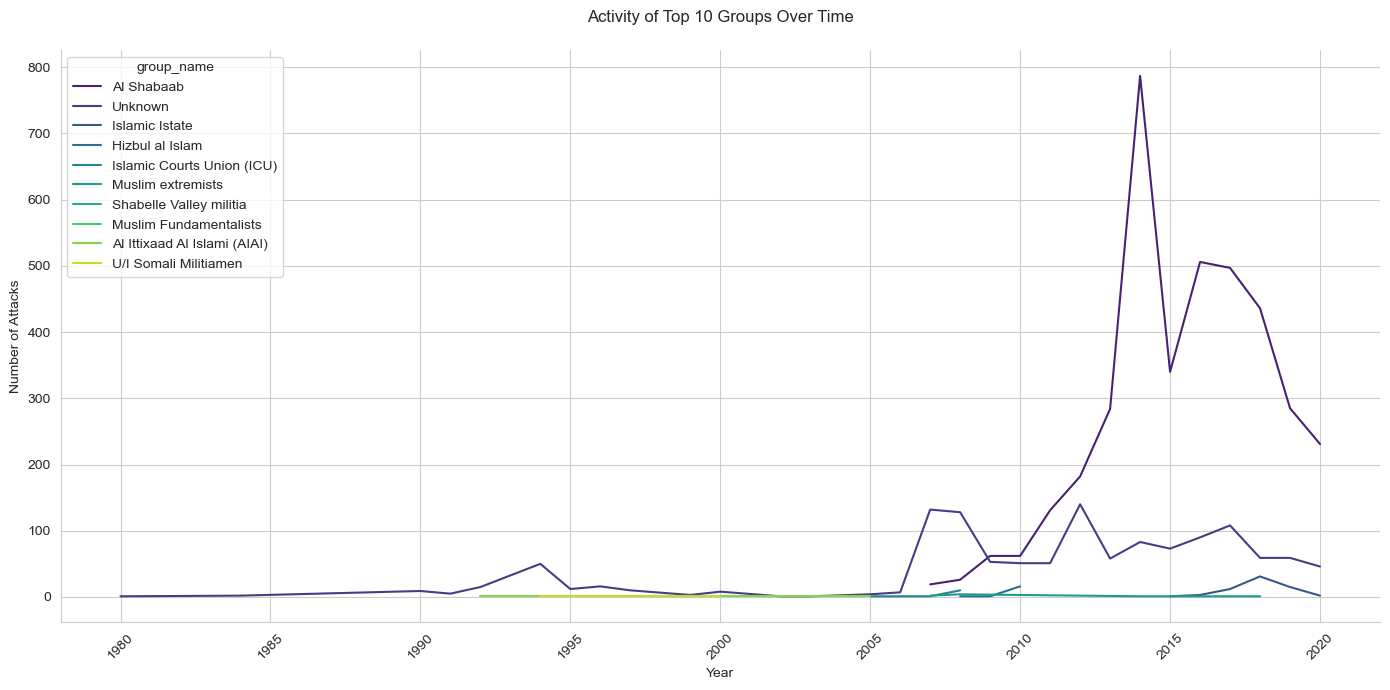

In [109]:
# Group by year and group_name to count the number of attacks over time
group_activity = df.groupby(['year', 'group_name']).size().sort_values(ascending=False).reset_index(name='attack_count')

# Filter for the top 10 groups in terms of total attacks
top_groups = df['group_name'].value_counts().head(10).index
group_activity = group_activity[group_activity['group_name'].isin(top_groups)]

# Plot the line chart to show the activity of groups over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=group_activity, x='year', y='attack_count', hue='group_name', palette='viridis')

# Customize the plot
plt.title("Activity of Top 10 Groups Over Time", pad=20)
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### **7. Target Analysis**

* **What are the most common target types (e.g., civilians, military)?**

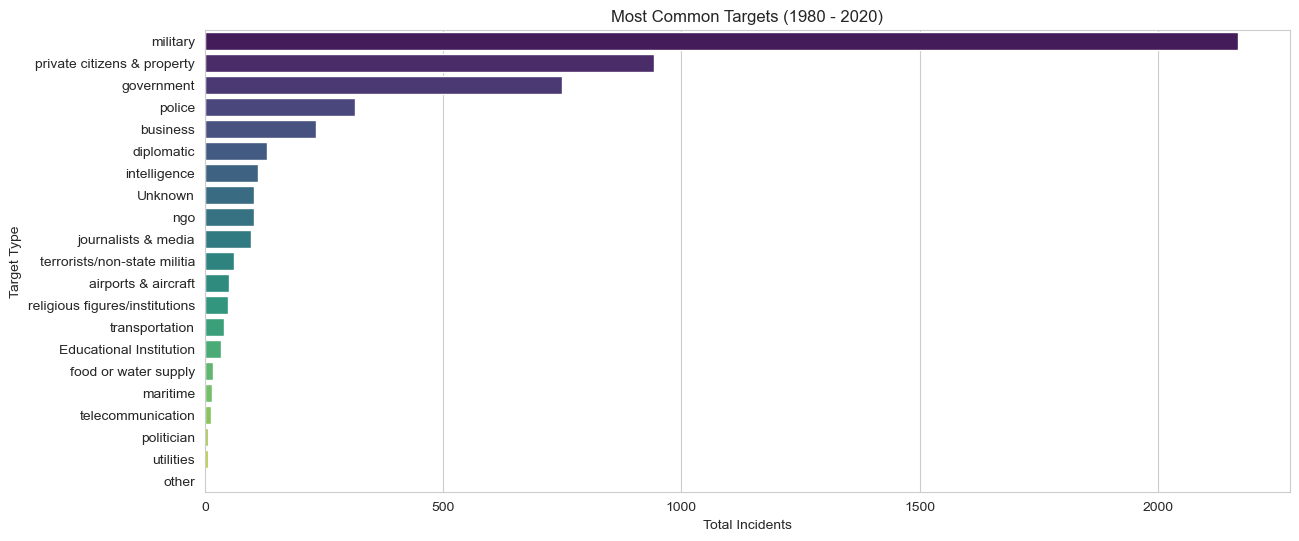

In [110]:
# Target types
target_types = df['target_type'].value_counts().reset_index()
target_types.columns = ['target_type', 'count']

plt.figure(figsize=(14, 6))
sns.barplot(data=target_types, x='count', y='target_type', palette='viridis')
plt.title('Most Common Targets (1980 - 2020)')
plt.xlabel('Total Incidents')
plt.ylabel('Target Type')
plt.show()

**Key Points:**
- The military is the most common target, with civilians and government entities also significantly affected.
- Businesses, police, and diplomatic entities are common targets, highlighting the diverse impact of terrorism.
- Less frequent targets indicate a broader spectrum of potential threats.
- The data may not capture all incidents, and specific contexts may be lacking, necessitating further investigation.

* **How does target type influence attack success or casualties?**

In [127]:
# Group by target type and calculate success rate and total casualties
target_success_casualties = df.groupby('target_type').agg(
    success_rate=('success', 'mean'),
    total_casualties=('total_casualties', 'sum')
).reset_index()

# Sort by total casualties and filter for top 10 target types
target_success_casualties = target_success_casualties.sort_values(by='total_casualties', ascending=False)
target_success_casualties.head(10)

,target_type,success_rate,total_casualties
10,military,0.928077,9493
15,private citizens & property,0.954352,4063
3,business,0.965665,3373
6,government,0.795728,3319
13,police,0.895238,1187
18,terrorists/non-state militia,0.967213,518
4,diplomatic,0.946154,447
19,transportation,1.000000,311
7,intelligence,0.928571,285
16,religious figures/institutions,0.979592,198


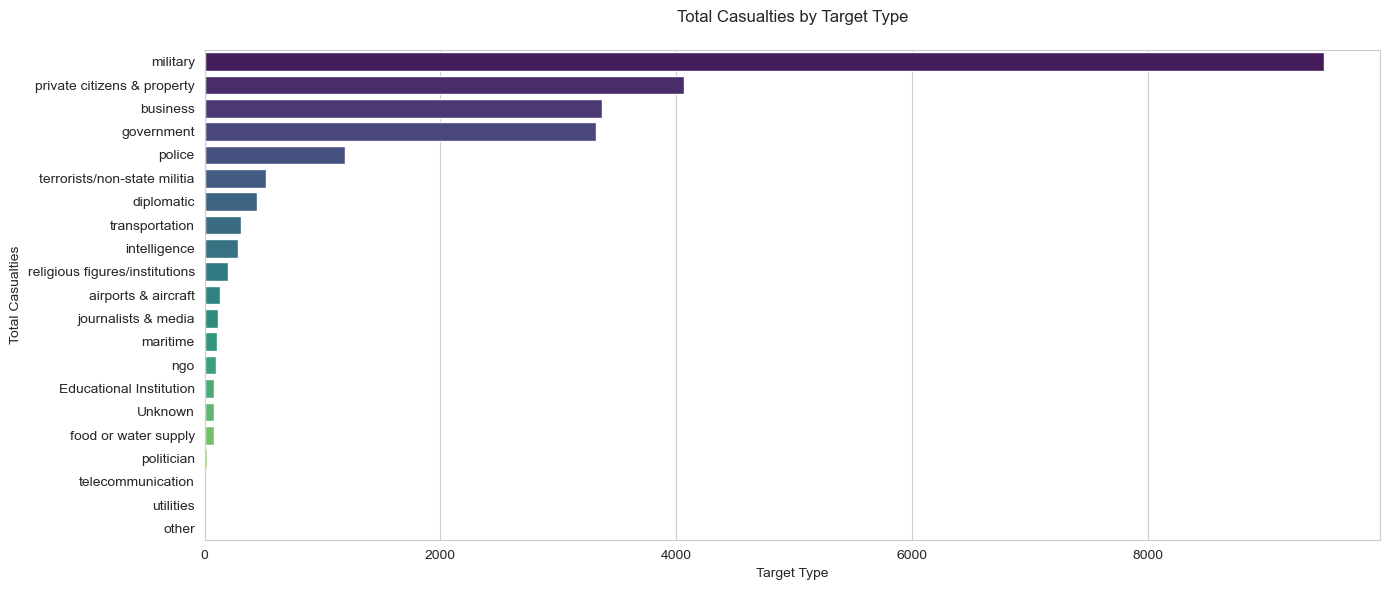

In [128]:
# Sort by total casualties and filter for top 10 target types
target_success_casualties = target_success_casualties.sort_values(by='total_casualties', ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(data=target_success_casualties, x='total_casualties', y='target_type', palette='viridis')
plt.title("Total Casualties by Target Type", pad=20)
plt.xlabel("Target Type")
plt.ylabel("Total Casualties")
sns.set_style("whitegrid")
plt.tight_layout()
plt.show()

**Key Points:**
- The military is the primary target, with civilians and government entities significantly affected.
- The impact extends to businesses, police, and diplomatic entities, indicating a broad societal effect.
- Other categories reflect a range of potential threats but are less frequently targeted.
- Limitations in the data highlight the need for further investigation into specific contexts and broader patterns.

* **Are there trends in the nationality of targets?**

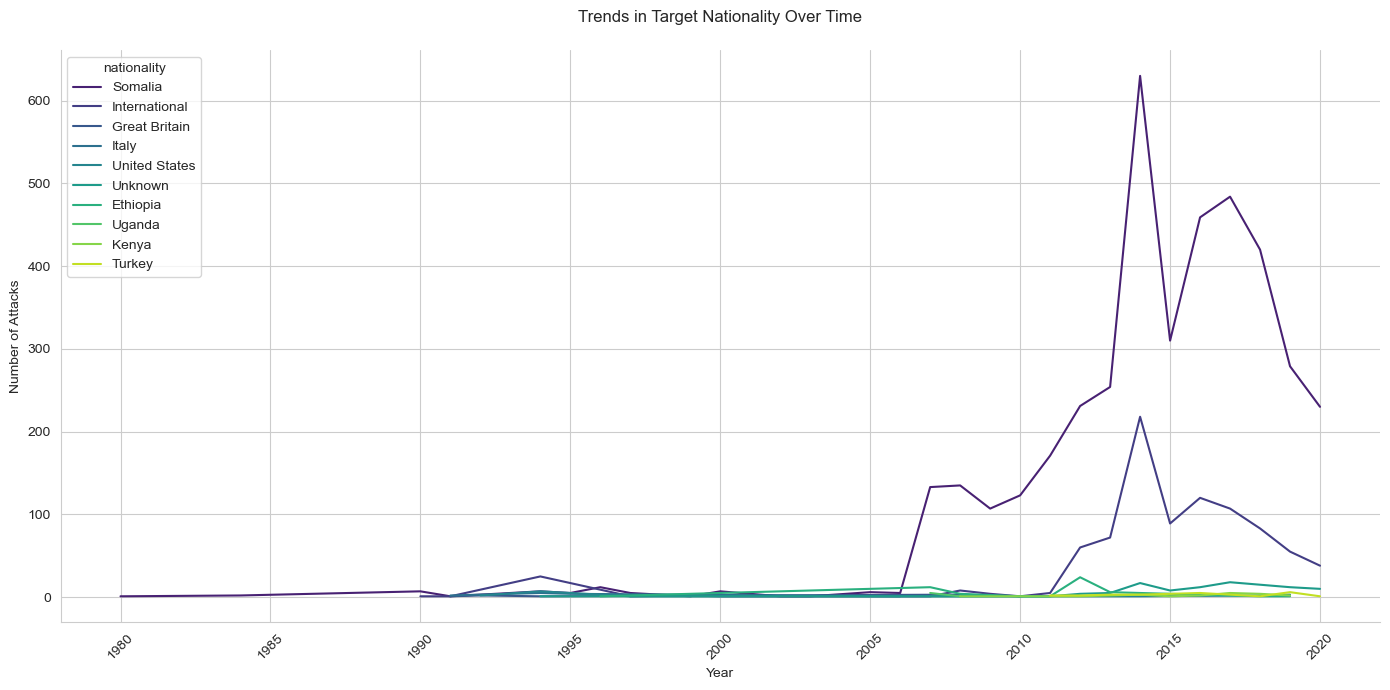

In [114]:
# Group by year and nationality to count the number of attacks over time
nationality_trends = df.groupby(['year', 'nationality']).size().reset_index(name='attack_count')

# Filter for top nationalities based on total attacks
top_nationalities = df['nationality'].value_counts().head(10).index
nationality_trends = nationality_trends[nationality_trends['nationality'].isin(top_nationalities)]

# Plot the line chart to show trends in target nationality over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=nationality_trends, x='year', y='attack_count', hue='nationality', palette='viridis')

# Customize the plot
plt.title("Trends in Target Nationality Over Time", pad=20)
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

* **How do the target types vary by year or month?**

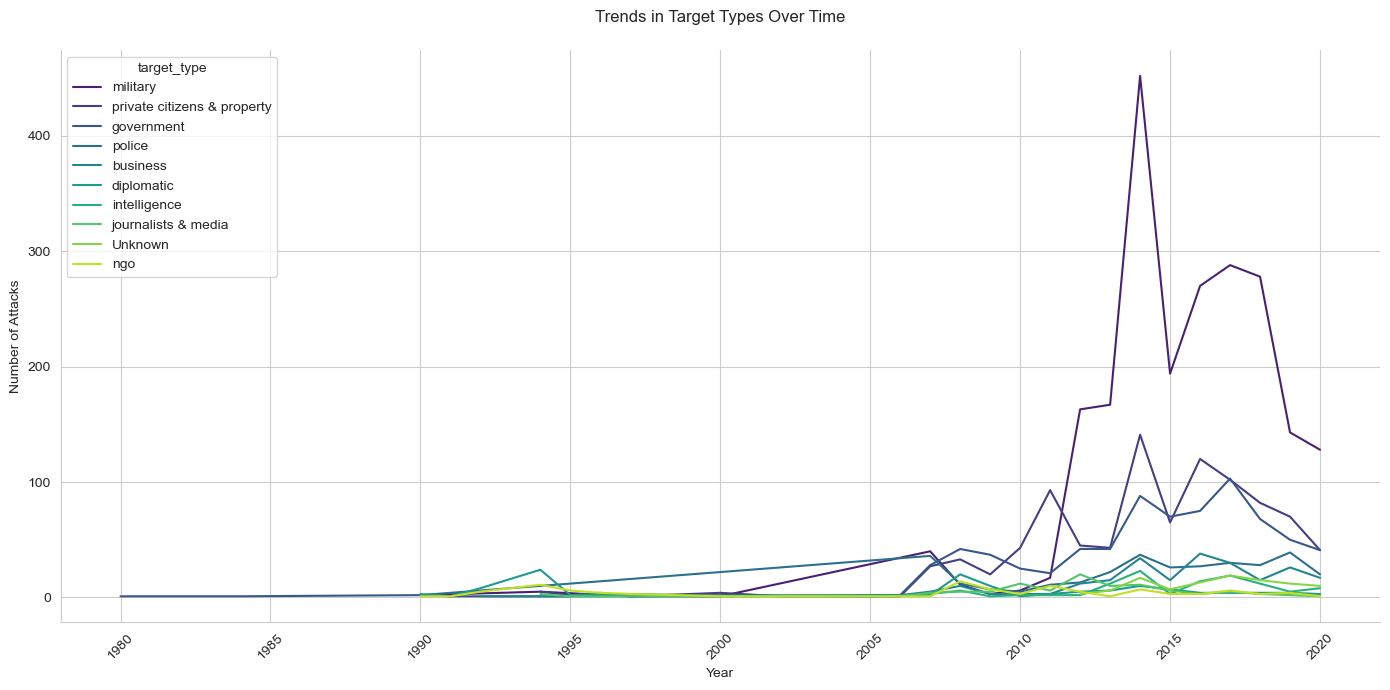

In [116]:
# Group by year and target type to count the number of attacks over time
target_year_trends = df.groupby(['year', 'target_type']).size().sort_values(ascending=False).reset_index(name='attack_count')

# Filter for top target types
top_targets = df['target_type'].value_counts().head(10).index
target_year_trends = target_year_trends[target_year_trends['target_type'].isin(top_targets)]

# Plot the line chart to show target type trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=target_year_trends, x='year', y='attack_count', hue='target_type', palette='viridis')

# Customize the plot
plt.title("Trends in Target Types Over Time", pad=20)
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

**Key Points:**
- Attacks targeting the military and civilians are increasing significantly.
- Other target categories show fluctuating trends, highlighting inconsistent targeting behavior.
- The presence of unknown targets suggests potential data gaps.
- Understanding these patterns requires considering various influencing factors.
- Limitations in data collection point to the need for further investigation to paint a complete picture of the situation.

### **8. Success Rate of Attacks**

* **What is the overall success rate of terrorist attacks in Somalia?**

In [117]:
# Calculate the overall success rate
overall_success_rate = df['success'].mean() * 100  # Multiply by 100 for percentage

# Display the result using an f-string
success_rate_message = f"Overall Success Rate of Terrorist Attacks: {overall_success_rate:.2f}%"
print(success_rate_message)


Overall Success Rate of Terrorist Attacks: 90.51%


In [118]:
# Grouping by both region and city
df_region_city = pd.DataFrame(df[df['success'] == 1].groupby(['region', 'city']).size(), columns=['Successful'])
df_region_city['Not_Successful'] = df[df['success'] == 0].groupby(['region', 'city']).size()
df_region_city.fillna(0, inplace=True)
df_region_city['Total'] = df_region_city['Successful'] + df_region_city['Not_Successful']
df_region_city['Success_Rate'] = df_region_city['Successful'] / df_region_city['Total'] * 100

# Sort by total events and filter top 10
df_region_city.sort_values(by='Total', ascending=False, inplace=True)
top_10_region_city = df_region_city.head()
top_10_region_city

,,Successful,Not_Successful,Total,Success_Rate
region,city,,,,
Banaadir,Mogadishu,1800,176.0,1976.0,91.093117
Jubbada Hoose,Kismaayo,209,21.0,230.0,90.869565
Baay,Baydhaba,179,12.0,191.0,93.717277
Hiiraan,Beledweyne,145,11.0,156.0,92.948718
Shabeellaha Hoose,Afgooye,143,13.0,156.0,91.666667


In [119]:
# Grouping by region
df_region = pd.DataFrame(df[df['success'] == 1].groupby(['region']).size(), columns=['Successful'])
df_region['Not_Successful'] = df[df['success'] == 0].groupby(['region']).size()
df_region.fillna(0, inplace=True)
df_region['Total'] = df_region['Successful'] + df_region['Not_Successful']
df_region['Success_Rate'] = df_region['Successful'] / df_region['Total'] * 100

# Optional: Sort by total events if needed
df_region.sort_values(by='Total', ascending=False, inplace=True)
df_region = df_region.head(10)
df_region

,Successful,Not_Successful,Total,Success_Rate
region,,,,
Banaadir,1824,178.0,2002.0,91.108891
Shabeellaha Hoose,728,94.0,822.0,88.564477
Jubbada Hoose,372,38.0,410.0,90.731707
Baay,366,29.0,395.0,92.658228
Hiiraan,313,30.0,343.0,91.253644
Gedo,280,33.0,313.0,89.456869
Shabeellaha Dhexe,202,19.0,221.0,91.402715
Mudug,164,18.0,182.0,90.109890
Bari,159,20.0,179.0,88.826816


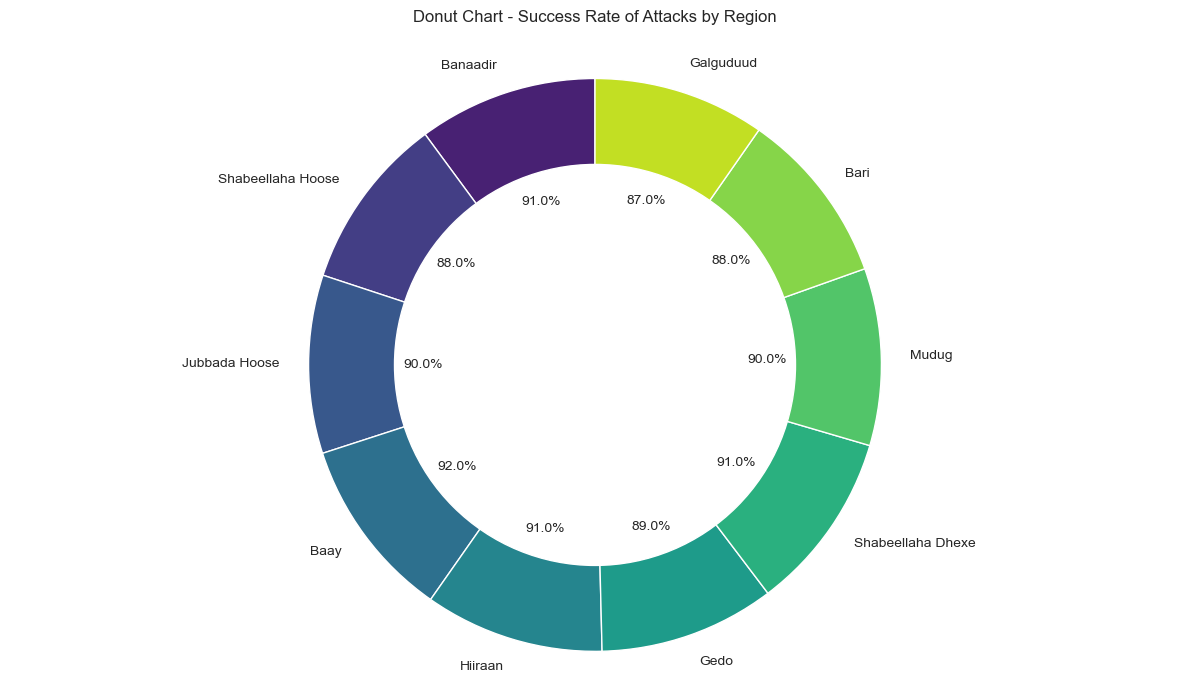

In [120]:
# Data for the region chart
labels_region = df_region.index  # Region names
sizes_region = df_region['Success_Rate']  # Success Rate as percentage

# Set color palette using seaborn viridis
colors_region = sns.color_palette('viridis', len(labels_region))

# Custom autopct function to display actual success rates from the DataFrame
def absolute_value(val, sizes):
    a = int(val / 100. * sum(sizes))  # Convert pie wedge value to the actual success rate
    return f'{a:.1f}%'
# Donut Chart for Region Success Rates
plt.figure(figsize=(12, 7))
plt.pie(sizes_region, labels=labels_region, colors=colors_region, autopct=lambda val: absolute_value(val, sizes_region), startangle=90, labeldistance=1.1)
centre_circle_region = plt.Circle((0, 0), 0.70, fc='white')  # Add a white circle in the center
plt.gca().add_artist(centre_circle_region)
plt.axis('equal')  
plt.title('Donut Chart - Success Rate of Attacks by Region', pad=20)  # Increased padding
plt.tight_layout()
plt.show()

**Key Points:**
- Most regions experience high success rates for terrorist attacks.
- Baay region shows the highest success rate at 92%.
- Banadir, Shabeellaha Dhexe, Gedo, and Hiiraan have a success rate of 91%.
- Galguduud has the lowest success rate at 87%.
- Variations in success rates are influenced by multiple factors.
- Further analysis is required to provide context and detail regarding the nature of attacks.

In [121]:
# Grouping by city
df_city = pd.DataFrame(df[df['success'] == 1].groupby(['city']).size(), columns=['Successful'])
df_city['Not_Successful'] = df[df['success'] == 0].groupby(['city']).size()
df_city.fillna(0, inplace=True)
df_city['Total'] = df_city['Successful'] + df_city['Not_Successful']
df_city['Success_Rate'] = df_city['Successful'] / df_city['Total'] * 100

# Optional: Sort by total events if needed
df_city.sort_values(by='Total', ascending=False, inplace=True)
df_city = df_city.head(10)
df_city

,Successful,Not_Successful,Total,Success_Rate
city,,,,
Mogadishu,1800,176.0,1976.0,91.093117
Kismaayo,209,21.0,230.0,90.869565
Baydhaba,179,12.0,191.0,93.717277
Afgooye,143,13.0,156.0,91.666667
Beledweyne,145,11.0,156.0,92.948718
Gaalkacyo,119,16.0,135.0,88.148148
Boosaaso,104,19.0,123.0,84.552846
Marka,105,9.0,114.0,92.105263
Qoryooleey,83,17.0,100.0,83.000000


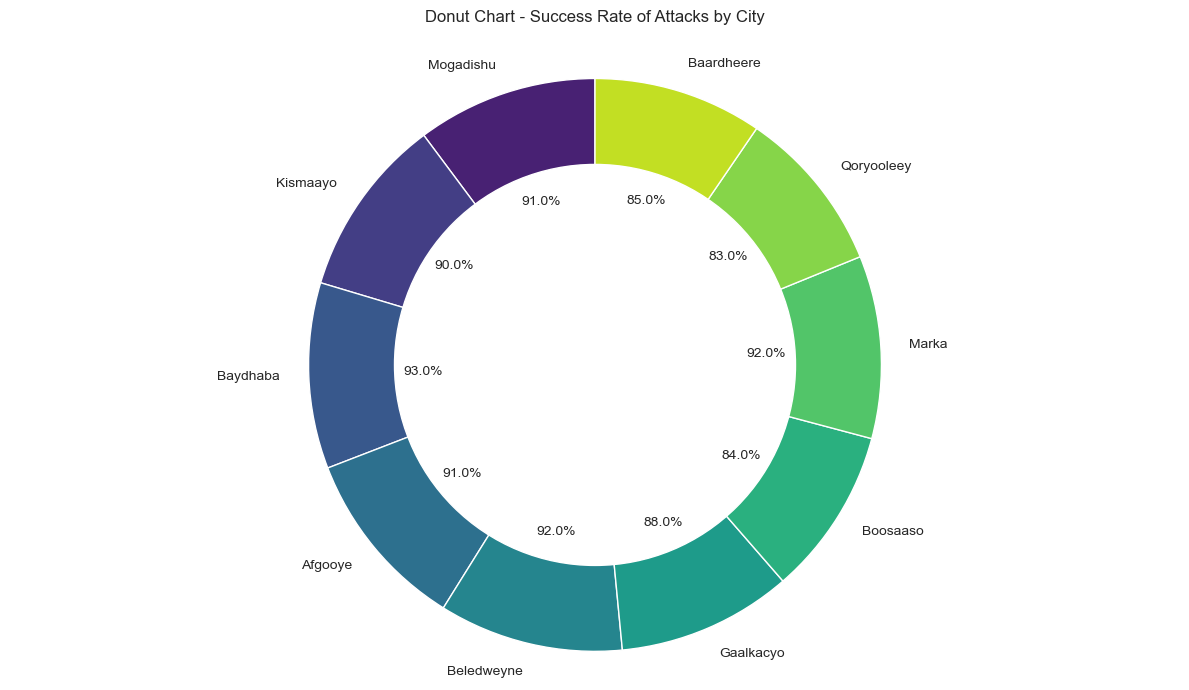

In [122]:
# Data for the city chart: labels are the city names, and sizes are the success rates
labels_city = df_city.index  # City names
sizes_city = df_city['Success_Rate']  # Success Rate as percentage

# Set color palette using seaborn viridis
colors_city = sns.color_palette('viridis', len(labels_city))

# Custom autopct function to display actual success rates from the DataFrame
def absolute_value(val, sizes):
    a = int(val / 100. * sum(sizes))  # Convert pie wedge value to the actual success rate
    return f'{a:.1f}%'

# Donut Chart for City Success Rates
plt.figure(figsize=(12, 7))
plt.pie(sizes_city, labels=labels_city, colors=colors_city, autopct=lambda val: absolute_value(val, sizes_city), startangle=90, labeldistance=1.1)
centre_circle_city = plt.Circle((0, 0), 0.70, fc='white')  # Add a white circle in the center
plt.gca().add_artist(centre_circle_city)
plt.axis('equal')  
plt.title('Donut Chart - Success Rate of Attacks by City', pad=20)  # Increased padding
plt.tight_layout()
plt.show()

**Key Points:**
- Most cities show high success rates for terrorist attacks.
- Mogadishu has the highest success rate at 93%.
- Several other cities also report success rates above 90%.
- Baardheere and Qoryooleey have slightly lower success rates.
- Success rate variations can be linked to multiple factors.
- Further analysis is needed for a comprehensive understanding of attack dynamics.

### **Conclusion**

This analysis reveals critical insights into the patterns and effectiveness of these violent incidents. The Banadir region, particularly **Mogadishu**, stands out as the most targeted area, accounting for **39.4%** of total attacks and achieving a **93%** success rate. Other heavily affected regions include **Shabeellaha Hoose** and **Jubbada Hoose**, underscoring a troubling trend in coastal cities, which represent **51.7%** of all attacks. 

Overall, the data highlights a significant threat posed by terrorist groups, with high success rates—ranging from **83% to 94%**—indicating the effectiveness of these attacks across the country. The findings emphasize the urgent need for enhanced security measures in the most targeted regions to mitigate the impact of terrorism and protect civilian lives.


### **Key Insights**

1. **Most Targeted Regions:**
   - Banadir is the most attacked region, with **39.4%** of all attacks.
   - Shabeellaha Hoose and Jubbada Hoose follow as significant targets.

2. **High Success Rates:**
   - Success rates for attacks range from **83% to 94%**, indicating a high effectiveness in execution.

3. **City-Level Impact:**
   - Mogadishu has the highest number of attacks (**39.4%**) and a **93%** success rate.
   - Coastal cities are primary targets, accounting for **51.7%** of attacks.

4. **Victim Demographics:**
   - Civilians and government entities are the primary targets, highlighting vulnerabilities.

5. **Attack Types:**
   - Bombings and armed assaults are the predominant methods used by terrorists.

6. **Temporal Patterns:**
   - Attack frequency spikes during political instability and military operations.

7. **Variation in Success Rates:**
   - Local security measures and terrorist capabilities influence attack success.

8. **Community Impact:**
   - Terrorism leads to significant displacement, trauma, and economic instability.

9. **Data Limitations:**
   - The analysis lacks specifics on attack types and timeframes, indicating a need for further research.

10. **Urgent Need for Enhanced Security:**
    - The findings stress the necessity of improved security measures in the most affected areas to combat terrorism effectively.